# Galaxy Zoo

Understanding how and why we are here is one of the fundamental questions for the human race. Part of the answer to this question lies in the origins of galaxies, such as our own Milky Way. Yet questions remain about how the Milky Way (or any of the other ~100 billion galaxies in our Universe) was formed and has evolved. Galaxies come in all shapes, sizes and colors: from beautiful spirals to huge ellipticals. Understanding the distribution, location and types of galaxies as a function of shape, size, and color are critical pieces for solving this puzzle.

![Image Credit: ESA/Hubble & NASA](https://storage.googleapis.com/kaggle-competitions/kaggle/3175/media/mainimage.jpg)

With each passing day telescopes around and above the Earth capture more and more images of distant galaxies. As better and bigger telescopes continue to collect these images, the datasets begin to explode in size. In order to better understand how the different shapes (or morphologies) of galaxies relate to the physics that create them, such images need to be sorted and classified. 

Hence the Galaxy Zoo Challenge!

### Happy EDA! Feel free to fork this notebook and add your own inputs and experiment! Do drop any questions or tips for improvements in the comments, and dont forget to Upvote! For more such projects and ML in general, visit my [Github/shibinjudahpaul](https://github.com/shibinjudahpaul)

## Goal
The aim is to analyze the JPG images of galaxies to find automated metrics that reproduce the probability distributions derived from human classifications. For each galaxy, determine the probability that it belongs in a particular class. 

## Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import random
import matplotlib.pyplot as plt

## Unzip the training data  

In [3]:
!unzip -q /kaggle/input/galaxy-zoo-the-galaxy-challenge/training_solutions_rev1.zip

## Read and split the data and divide it in training and testing data

In [4]:
df = pd.read_csv('/kaggle/working/training_solutions_rev1.csv')

df_train, df_test = train_test_split(df[:30000], test_size=.2)
df_train.shape, df_test.shape

((24000, 38), (6000, 38))

#### Basic EDA

In [43]:
df_train.describe()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,320881.897125,0.429947,0.545164,0.024888,0.106822,0.438342,0.103257,0.335085,0.218346,0.219996,...,0.032637,0.092569,0.084921,0.040856,0.015481,0.095669,0.017968,0.007567,0.006999,0.074661
std,125992.170850,0.282140,0.295104,0.037866,0.213228,0.301427,0.178376,0.247397,0.286590,0.179179,...,0.098010,0.144988,0.141170,0.101593,0.052437,0.195957,0.069136,0.038266,0.037331,0.107913
min,100008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,211454.250000,0.176526,0.286237,0.000000,0.000000,0.170373,0.000000,0.124566,0.000000,0.072820,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,322710.000000,0.413404,0.564267,0.014750,0.000000,0.401407,0.000000,0.293402,0.097783,0.184297,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,429290.750000,0.673320,0.810617,0.033851,0.085744,0.694557,0.135722,0.519272,0.336786,0.338999,...,0.000000,0.149117,0.128037,0.032074,0.000000,0.100016,0.000000,0.000000,0.000000,0.130853
max,540188.000000,1.000000,1.000000,0.935147,1.000000,1.000000,1.000000,1.000000,1.000000,0.925311,...,0.901991,0.949733,0.877393,0.991539,0.843726,1.000000,0.975913,0.957000,0.938881,0.664057


In [39]:
print("Shape of the train set: ",df_train.shape)

print("Shape of the test set: ",df_test.shape)

Shape of the train set:  (24000, 38)
Shape of the test set:  (6000, 38)


#### Unzipping train and test images

In [7]:
!unzip -q /kaggle/input/galaxy-zoo-the-galaxy-challenge/images_training_rev1.zip
!unzip -q /kaggle/input/galaxy-zoo-the-galaxy-challenge/images_test_rev1.zip

#### EDA Images

In [8]:
trainPath = '/kaggle/working/images_training_rev1'
testPath = '/kaggle/working/images_test_rev1'

In [9]:
def plot_random_galaxy(path, sample = 5):
    random_image=random.sample(os.listdir(path),sample)
 
    plt.figure(figsize=(16,5))
    for i in range(sample):
        
        plt.subplot(1,sample,i+1)
        img=tf.io.read_file(os.path.join(path,random_image[i]))
        img=tf.io.decode_image(img)
        plt.imshow(img)
        plt.title(f'Class: {random_image[i]}\nShape: {img.shape}')
        plt.axis(False) 

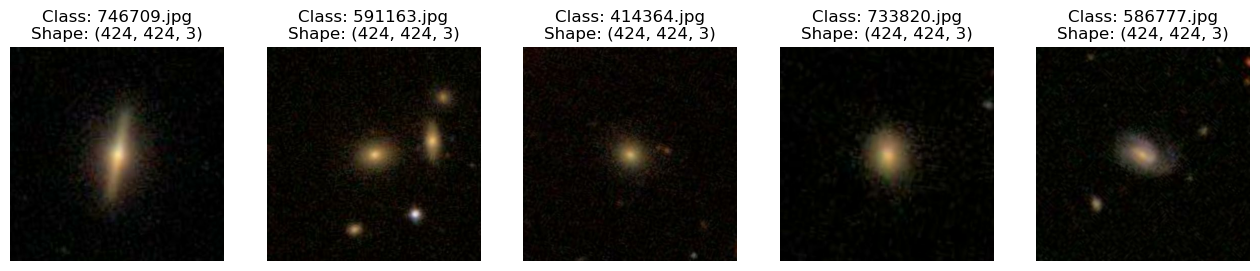

In [10]:
plot_random_galaxy(trainPath)

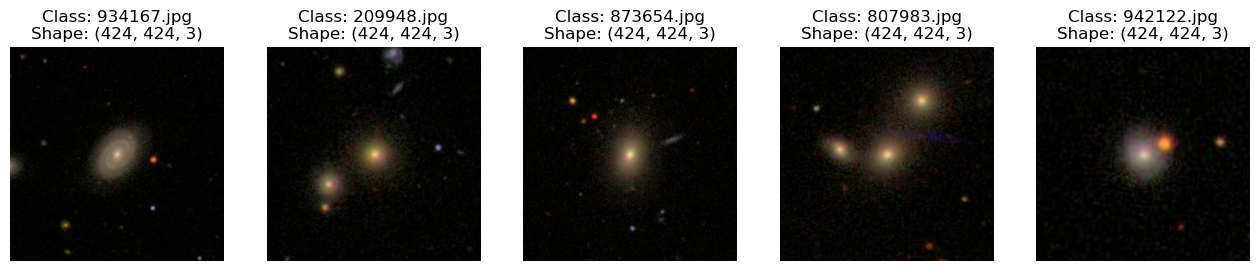

In [45]:
plot_random_galaxy(testPath)

**We can see a mix of elliptical and spiral galaxies in both train and test datasets.**

#### Read images in reference to the csv file, Resize and split them into train and test data(X,y) 

In [11]:

from skimage.transform import resize
from tqdm import tqdm # progress which the model
import matplotlib.pyplot as plt
%matplotlib inline
          

ORIG_SHAPE = (424,424)
CROP_SIZE = (256,256)
IMG_SHAPE = (64,64)

def get_image(path, x1,y1, shape, crop_size):
    x = plt.imread(path)
    x = x[x1:x1+crop_size[0], y1:y1+crop_size[1]]
    x = resize(x, shape)
    x = x/255.
    return x
    
def get_all_images(dataframe, shape=IMG_SHAPE, crop_size=CROP_SIZE):
    x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
    y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
   
    sel = dataframe.values
    ids = sel[:,0].astype(int).astype(str)
    y_batch = sel[:,1:]
    x_batch = []
    for i in tqdm(ids):
        x = get_image('/kaggle/working/images_training_rev1/'+i+'.jpg', x1,y1, shape=shape, crop_size=crop_size)
        x_batch.append(x)
    x_batch = np.array(x_batch)
    return x_batch, y_batch
        
X_train, y_train = get_all_images(df_train)
X_test, y_test = get_all_images(df_test)

100%|██████████| 6000/6000 [00:53<00:00, 111.24it/s]


In [12]:
X_train.shape

(24000, 64, 64, 3)

In [13]:
df_train.values[0].shape

(38,)

#### Build a Deep learning Model using Mirrored Strategy 

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPooling2D
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

#to use two GPUs in parallel
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    model = Sequential()
    model.add(Conv2D(512, (3, 3), input_shape=(IMG_SHAPE[0], IMG_SHAPE[1], 3)))
    model.add(Conv2D(256, (3, 3)))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3)))
    model.add(Conv2D(128, (3, 3)))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3)))
    model.add(Conv2D(128, (3, 3)))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(GlobalMaxPooling2D())


    model.add(Dropout(0.25))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(37))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy',root_mean_squared_error])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 512)       14336     
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 256)       1179904   
                                                                 
 activation (Activation)     (None, 60, 60, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 256)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 256)       590080    
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 128)       295040    
                                                        

#### begin training

In [15]:
batch_size = 128
with strategy.scope():
    model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test),use_multiprocessing=True)

Epoch 1/20
750/750 [==============================] - 75s 74ms/step - loss: 0.3237 - accuracy: 0.5631 - root_mean_squared_error: 0.1808 - val_loss: 0.3007 - val_accuracy: 0.5940 - val_root_mean_squared_error: 0.1642
Epoch 2/20
750/750 [==============================] - 52s 70ms/step - loss: 0.3030 - accuracy: 0.5994 - root_mean_squared_error: 0.1652 - val_loss: 0.2944 - val_accuracy: 0.5940 - val_root_mean_squared_error: 0.1585
Epoch 3/20
750/750 [==============================] - 52s 69ms/step - loss: 0.2965 - accuracy: 0.6000 - root_mean_squared_error: 0.1593 - val_loss: 0.2870 - val_accuracy: 0.5940 - val_root_mean_squared_error: 0.1512
Epoch 4/20
750/750 [==============================] - 52s 70ms/step - loss: 0.2868 - accuracy: 0.6126 - root_mean_squared_error: 0.1497 - val_loss: 0.2738 - val_accuracy: 0.6515 - val_root_mean_squared_error: 0.1378
Epoch 5/20
750/750 [==============================] - 52s 70ms/step - loss: 0.2728 - accuracy: 0.6323 - root_mean_squared_error: 0.1366 

#### After 20 epochs,

* **Loss:** 0.2476
* **Accuracy:** 0.7494
* **Root Mean Squared Error:** 0.1066
* **Validation loss:** 0.2443
* **Validation Accuracy:** 0.7567
* **Validation Root Mean Squared Error:** 0.1035

#### Generate predictions on test data

Choosing only 1000 images, as more will crash kaggle due to memory limits

In [16]:
import os
from tqdm import tqdm
batch_size = 1
def test_image_generator(ids, shape=IMG_SHAPE):
    x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
    y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
    x_batch = []
    for i in ids:
        x = get_image('/kaggle/working/images_test_rev1/'+i, x1, y1, shape=IMG_SHAPE, crop_size=CROP_SIZE)
        x_batch.append(x)
    x_batch = np.array(x_batch)
    return x_batch

val_files = os.listdir('/kaggle/working/images_test_rev1/')
val_files = val_files[:1000]
val_predictions = []
N_val = len(val_files)
for i in tqdm(np.arange(0, N_val, batch_size)):
    if i+batch_size > N_val:
        upper = N_val
    else:
        upper = i+batch_size
    X = test_image_generator(val_files[i:upper])
    y_pred = model.predict(X, verbose=0)
    val_predictions.append(y_pred)
val_predictions = np.array(val_predictions)
Y_pred = np.vstack(val_predictions)
ids = np.array([v.split('.')[0] for v in val_files]).reshape(len(val_files),1)
submission_df = pd.DataFrame(np.hstack((ids, Y_pred)), columns=df.columns)
submission_df = submission_df.sort_values(by=['GalaxyID'])
submission_df.to_csv('sample_submission.csv', index=False)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


  0%|          | 1/1000 [00:01<29:53,  1.79s/it]

1/1 [==============================] - 0s 123ms/step


  0%|          | 2/1000 [00:01<14:13,  1.17it/s]

1/1 [==============================] - 0s 127ms/step


  0%|          | 3/1000 [00:02<09:14,  1.80it/s]

1/1 [==============================] - 0s 122ms/step


  0%|          | 4/1000 [00:02<06:48,  2.44it/s]

1/1 [==============================] - 0s 127ms/step


  0%|          | 5/1000 [00:02<05:33,  2.98it/s]

1/1 [==============================] - 0s 128ms/step


  1%|          | 6/1000 [00:02<04:45,  3.48it/s]

1/1 [==============================] - 0s 130ms/step


  1%|          | 7/1000 [00:02<04:16,  3.88it/s]

1/1 [==============================] - 0s 189ms/step


  1%|          | 8/1000 [00:03<04:22,  3.78it/s]

1/1 [==============================] - 0s 173ms/step


  1%|          | 9/1000 [00:03<04:22,  3.78it/s]

1/1 [==============================] - 0s 132ms/step


  1%|          | 10/1000 [00:03<04:11,  3.94it/s]

1/1 [==============================] - 0s 121ms/step


  1%|          | 11/1000 [00:03<03:50,  4.28it/s]

1/1 [==============================] - 0s 126ms/step


  1%|          | 12/1000 [00:04<03:38,  4.52it/s]

1/1 [==============================] - 0s 130ms/step


  1%|▏         | 13/1000 [00:04<03:31,  4.67it/s]

1/1 [==============================] - 0s 129ms/step


  1%|▏         | 14/1000 [00:04<05:04,  3.23it/s]

1/1 [==============================] - 0s 127ms/step


  2%|▏         | 15/1000 [00:05<04:30,  3.64it/s]

1/1 [==============================] - 0s 132ms/step


  2%|▏         | 16/1000 [00:05<04:08,  3.96it/s]

1/1 [==============================] - 0s 123ms/step


  2%|▏         | 17/1000 [00:05<03:50,  4.26it/s]

1/1 [==============================] - 0s 133ms/step


  2%|▏         | 18/1000 [00:05<03:39,  4.46it/s]

1/1 [==============================] - 0s 127ms/step


  2%|▏         | 19/1000 [00:05<03:30,  4.66it/s]

1/1 [==============================] - 0s 120ms/step


  2%|▏         | 20/1000 [00:06<03:23,  4.81it/s]

1/1 [==============================] - 0s 130ms/step


  2%|▏         | 21/1000 [00:06<03:21,  4.87it/s]

1/1 [==============================] - 0s 127ms/step


  2%|▏         | 22/1000 [00:06<03:16,  4.98it/s]

1/1 [==============================] - 0s 128ms/step


  2%|▏         | 23/1000 [00:06<03:14,  5.01it/s]

1/1 [==============================] - 0s 139ms/step


  2%|▏         | 24/1000 [00:06<03:16,  4.95it/s]

1/1 [==============================] - 0s 135ms/step


  2%|▎         | 25/1000 [00:07<03:16,  4.96it/s]

1/1 [==============================] - 0s 130ms/step


  3%|▎         | 26/1000 [00:07<03:14,  5.01it/s]

1/1 [==============================] - 0s 127ms/step


  3%|▎         | 27/1000 [00:07<03:13,  5.02it/s]

1/1 [==============================] - 0s 128ms/step


  3%|▎         | 28/1000 [00:07<03:12,  5.06it/s]

1/1 [==============================] - 0s 127ms/step


  3%|▎         | 29/1000 [00:07<03:11,  5.08it/s]

1/1 [==============================] - 0s 120ms/step


  3%|▎         | 30/1000 [00:07<03:07,  5.18it/s]

1/1 [==============================] - 0s 123ms/step


  3%|▎         | 31/1000 [00:08<03:07,  5.17it/s]

1/1 [==============================] - 0s 127ms/step


  3%|▎         | 32/1000 [00:08<03:06,  5.18it/s]

1/1 [==============================] - 0s 143ms/step


  3%|▎         | 33/1000 [00:08<03:12,  5.03it/s]

1/1 [==============================] - 0s 127ms/step


  3%|▎         | 34/1000 [00:08<03:10,  5.08it/s]

1/1 [==============================] - 0s 130ms/step


  4%|▎         | 35/1000 [00:08<03:12,  5.02it/s]

1/1 [==============================] - 0s 139ms/step


  4%|▎         | 36/1000 [00:09<03:13,  4.98it/s]

1/1 [==============================] - 0s 126ms/step


  4%|▎         | 37/1000 [00:09<03:10,  5.05it/s]

1/1 [==============================] - 0s 127ms/step


  4%|▍         | 38/1000 [00:09<03:09,  5.08it/s]

1/1 [==============================] - 0s 127ms/step


  4%|▍         | 39/1000 [00:09<03:07,  5.14it/s]

1/1 [==============================] - 0s 123ms/step


  4%|▍         | 40/1000 [00:09<03:07,  5.11it/s]

1/1 [==============================] - 0s 121ms/step


  4%|▍         | 41/1000 [00:10<03:04,  5.19it/s]

1/1 [==============================] - 0s 131ms/step


  4%|▍         | 42/1000 [00:10<03:05,  5.17it/s]

1/1 [==============================] - 0s 128ms/step


  4%|▍         | 43/1000 [00:10<03:05,  5.17it/s]

1/1 [==============================] - 0s 130ms/step


  4%|▍         | 44/1000 [00:10<03:05,  5.15it/s]

1/1 [==============================] - 0s 129ms/step


  4%|▍         | 45/1000 [00:10<03:05,  5.15it/s]

1/1 [==============================] - 0s 125ms/step


  5%|▍         | 46/1000 [00:11<03:04,  5.18it/s]

1/1 [==============================] - 0s 124ms/step


  5%|▍         | 47/1000 [00:11<03:02,  5.23it/s]

1/1 [==============================] - 0s 130ms/step


  5%|▍         | 48/1000 [00:11<03:02,  5.21it/s]

1/1 [==============================] - 0s 126ms/step


  5%|▍         | 49/1000 [00:11<03:02,  5.20it/s]

1/1 [==============================] - 0s 122ms/step


  5%|▌         | 50/1000 [00:11<03:00,  5.26it/s]

1/1 [==============================] - 0s 129ms/step


  5%|▌         | 51/1000 [00:12<03:02,  5.20it/s]

1/1 [==============================] - 0s 119ms/step


  5%|▌         | 52/1000 [00:12<02:59,  5.29it/s]

1/1 [==============================] - 0s 125ms/step


  5%|▌         | 53/1000 [00:12<02:59,  5.29it/s]

1/1 [==============================] - 0s 128ms/step


  5%|▌         | 54/1000 [00:12<02:59,  5.26it/s]

1/1 [==============================] - 0s 125ms/step


  6%|▌         | 55/1000 [00:12<02:59,  5.26it/s]

1/1 [==============================] - 0s 127ms/step


  6%|▌         | 56/1000 [00:13<03:00,  5.24it/s]

1/1 [==============================] - 0s 127ms/step


  6%|▌         | 57/1000 [00:13<03:00,  5.22it/s]

1/1 [==============================] - 0s 123ms/step


  6%|▌         | 58/1000 [00:13<03:00,  5.21it/s]

1/1 [==============================] - 0s 120ms/step


  6%|▌         | 59/1000 [00:13<02:59,  5.25it/s]

1/1 [==============================] - 0s 128ms/step


  6%|▌         | 60/1000 [00:13<02:59,  5.25it/s]

1/1 [==============================] - 0s 125ms/step


  6%|▌         | 61/1000 [00:13<03:00,  5.21it/s]

1/1 [==============================] - 0s 215ms/step


  6%|▌         | 62/1000 [00:14<03:29,  4.47it/s]

1/1 [==============================] - 0s 180ms/step


  6%|▋         | 63/1000 [00:14<03:44,  4.18it/s]

1/1 [==============================] - 0s 133ms/step


  6%|▋         | 64/1000 [00:14<03:44,  4.16it/s]

1/1 [==============================] - 0s 127ms/step


  6%|▋         | 65/1000 [00:14<03:33,  4.39it/s]

1/1 [==============================] - 0s 127ms/step


  7%|▋         | 66/1000 [00:15<03:23,  4.59it/s]

1/1 [==============================] - 0s 136ms/step


  7%|▋         | 67/1000 [00:15<03:18,  4.69it/s]

1/1 [==============================] - 0s 125ms/step


  7%|▋         | 68/1000 [00:15<03:12,  4.84it/s]

1/1 [==============================] - 0s 127ms/step


  7%|▋         | 69/1000 [00:15<03:07,  4.95it/s]

1/1 [==============================] - 0s 128ms/step


  7%|▋         | 70/1000 [00:15<03:06,  4.98it/s]

1/1 [==============================] - 0s 141ms/step


  7%|▋         | 71/1000 [00:16<03:13,  4.79it/s]

1/1 [==============================] - 0s 141ms/step


  7%|▋         | 72/1000 [00:16<03:14,  4.78it/s]

1/1 [==============================] - 0s 123ms/step


  7%|▋         | 73/1000 [00:16<03:09,  4.90it/s]

1/1 [==============================] - 0s 126ms/step


  7%|▋         | 74/1000 [00:16<03:06,  4.97it/s]

1/1 [==============================] - 0s 137ms/step


  8%|▊         | 75/1000 [00:17<03:07,  4.93it/s]

1/1 [==============================] - 0s 214ms/step


  8%|▊         | 76/1000 [00:17<03:37,  4.25it/s]

1/1 [==============================] - 0s 168ms/step


  8%|▊         | 77/1000 [00:17<03:45,  4.10it/s]

1/1 [==============================] - 0s 205ms/step


  8%|▊         | 78/1000 [00:17<03:59,  3.85it/s]

1/1 [==============================] - 0s 176ms/step


  8%|▊         | 79/1000 [00:18<04:02,  3.80it/s]

1/1 [==============================] - 0s 165ms/step


  8%|▊         | 80/1000 [00:18<03:59,  3.83it/s]

1/1 [==============================] - 0s 130ms/step


  8%|▊         | 81/1000 [00:18<03:41,  4.14it/s]

1/1 [==============================] - 0s 123ms/step


  8%|▊         | 82/1000 [00:18<03:26,  4.44it/s]

1/1 [==============================] - 0s 120ms/step


  8%|▊         | 83/1000 [00:18<03:17,  4.64it/s]

1/1 [==============================] - 0s 126ms/step


  8%|▊         | 84/1000 [00:19<03:10,  4.81it/s]

1/1 [==============================] - 0s 125ms/step


  8%|▊         | 85/1000 [00:19<03:05,  4.94it/s]

1/1 [==============================] - 0s 121ms/step


  9%|▊         | 86/1000 [00:19<03:01,  5.04it/s]

1/1 [==============================] - 0s 126ms/step


  9%|▊         | 87/1000 [00:19<03:00,  5.05it/s]

1/1 [==============================] - 0s 122ms/step


  9%|▉         | 88/1000 [00:19<02:57,  5.13it/s]

1/1 [==============================] - 0s 121ms/step


  9%|▉         | 89/1000 [00:20<02:54,  5.21it/s]

1/1 [==============================] - 0s 126ms/step


  9%|▉         | 90/1000 [00:20<02:53,  5.23it/s]

1/1 [==============================] - 0s 128ms/step


  9%|▉         | 91/1000 [00:20<02:54,  5.21it/s]

1/1 [==============================] - 0s 121ms/step


  9%|▉         | 92/1000 [00:20<02:53,  5.23it/s]

1/1 [==============================] - 0s 132ms/step


  9%|▉         | 93/1000 [00:20<02:55,  5.16it/s]

1/1 [==============================] - 0s 124ms/step


  9%|▉         | 94/1000 [00:21<02:54,  5.20it/s]

1/1 [==============================] - 0s 124ms/step


 10%|▉         | 95/1000 [00:21<02:52,  5.24it/s]

1/1 [==============================] - 0s 131ms/step


 10%|▉         | 96/1000 [00:21<02:53,  5.21it/s]

1/1 [==============================] - 0s 126ms/step


 10%|▉         | 97/1000 [00:21<02:53,  5.20it/s]

1/1 [==============================] - 0s 133ms/step


 10%|▉         | 98/1000 [00:21<02:54,  5.16it/s]

1/1 [==============================] - 0s 131ms/step


 10%|▉         | 99/1000 [00:22<02:55,  5.13it/s]

1/1 [==============================] - 0s 120ms/step


 10%|█         | 100/1000 [00:22<02:53,  5.20it/s]

1/1 [==============================] - 0s 121ms/step


 10%|█         | 101/1000 [00:22<02:51,  5.23it/s]

1/1 [==============================] - 0s 129ms/step


 10%|█         | 102/1000 [00:22<02:53,  5.19it/s]

1/1 [==============================] - 0s 126ms/step


 10%|█         | 103/1000 [00:22<02:51,  5.22it/s]

1/1 [==============================] - 0s 123ms/step


 10%|█         | 104/1000 [00:22<02:52,  5.19it/s]

1/1 [==============================] - 0s 132ms/step


 10%|█         | 105/1000 [00:23<02:53,  5.17it/s]

1/1 [==============================] - 0s 127ms/step


 11%|█         | 106/1000 [00:23<02:54,  5.13it/s]

1/1 [==============================] - 0s 122ms/step


 11%|█         | 107/1000 [00:23<02:52,  5.18it/s]

1/1 [==============================] - 0s 129ms/step


 11%|█         | 108/1000 [00:23<02:51,  5.19it/s]

1/1 [==============================] - 0s 124ms/step


 11%|█         | 109/1000 [00:23<02:51,  5.20it/s]

1/1 [==============================] - 0s 129ms/step


 11%|█         | 110/1000 [00:24<02:52,  5.16it/s]

1/1 [==============================] - 0s 135ms/step


 11%|█         | 111/1000 [00:24<02:57,  5.01it/s]

1/1 [==============================] - 0s 122ms/step


 11%|█         | 112/1000 [00:24<02:54,  5.08it/s]

1/1 [==============================] - 0s 125ms/step


 11%|█▏        | 113/1000 [00:24<02:52,  5.13it/s]

1/1 [==============================] - 0s 129ms/step


 11%|█▏        | 114/1000 [00:24<02:53,  5.11it/s]

1/1 [==============================] - 0s 192ms/step


 12%|█▏        | 115/1000 [00:25<03:11,  4.62it/s]

1/1 [==============================] - 0s 183ms/step


 12%|█▏        | 116/1000 [00:25<03:29,  4.23it/s]

1/1 [==============================] - 0s 148ms/step


 12%|█▏        | 117/1000 [00:25<03:28,  4.24it/s]

1/1 [==============================] - 0s 128ms/step


 12%|█▏        | 118/1000 [00:25<03:16,  4.48it/s]

1/1 [==============================] - 0s 131ms/step


 12%|█▏        | 119/1000 [00:26<03:09,  4.65it/s]

1/1 [==============================] - 0s 128ms/step


 12%|█▏        | 120/1000 [00:26<03:03,  4.81it/s]

1/1 [==============================] - 0s 131ms/step


 12%|█▏        | 121/1000 [00:26<02:59,  4.91it/s]

1/1 [==============================] - 0s 126ms/step


 12%|█▏        | 122/1000 [00:26<02:56,  4.99it/s]

1/1 [==============================] - 0s 130ms/step


 12%|█▏        | 123/1000 [00:26<02:55,  4.99it/s]

1/1 [==============================] - 0s 126ms/step


 12%|█▏        | 124/1000 [00:27<02:53,  5.04it/s]

1/1 [==============================] - 0s 121ms/step


 12%|█▎        | 125/1000 [00:27<02:49,  5.15it/s]

1/1 [==============================] - 0s 140ms/step


 13%|█▎        | 126/1000 [00:27<02:52,  5.07it/s]

1/1 [==============================] - 0s 133ms/step


 13%|█▎        | 127/1000 [00:27<02:52,  5.05it/s]

1/1 [==============================] - 0s 125ms/step


 13%|█▎        | 128/1000 [00:27<02:51,  5.09it/s]

1/1 [==============================] - 0s 131ms/step


 13%|█▎        | 129/1000 [00:28<02:50,  5.10it/s]

1/1 [==============================] - 0s 124ms/step


 13%|█▎        | 130/1000 [00:28<02:48,  5.15it/s]

1/1 [==============================] - 0s 127ms/step


 13%|█▎        | 131/1000 [00:28<02:49,  5.13it/s]

1/1 [==============================] - 0s 127ms/step


 13%|█▎        | 132/1000 [00:28<02:47,  5.17it/s]

1/1 [==============================] - 0s 125ms/step


 13%|█▎        | 133/1000 [00:28<02:47,  5.18it/s]

1/1 [==============================] - 0s 131ms/step


 13%|█▎        | 134/1000 [00:29<02:48,  5.15it/s]

1/1 [==============================] - 0s 129ms/step


 14%|█▎        | 135/1000 [00:29<02:47,  5.17it/s]

1/1 [==============================] - 0s 130ms/step


 14%|█▎        | 136/1000 [00:29<02:47,  5.16it/s]

1/1 [==============================] - 0s 130ms/step


 14%|█▎        | 137/1000 [00:29<02:47,  5.14it/s]

1/1 [==============================] - 0s 127ms/step


 14%|█▍        | 138/1000 [00:29<02:48,  5.10it/s]

1/1 [==============================] - 0s 121ms/step


 14%|█▍        | 139/1000 [00:30<02:45,  5.19it/s]

1/1 [==============================] - 0s 123ms/step


 14%|█▍        | 140/1000 [00:30<02:44,  5.22it/s]

1/1 [==============================] - 0s 126ms/step


 14%|█▍        | 141/1000 [00:30<02:43,  5.25it/s]

1/1 [==============================] - 0s 129ms/step


 14%|█▍        | 142/1000 [00:30<02:45,  5.20it/s]

1/1 [==============================] - 0s 124ms/step


 14%|█▍        | 143/1000 [00:30<02:45,  5.19it/s]

1/1 [==============================] - 0s 127ms/step


 14%|█▍        | 144/1000 [00:30<02:45,  5.17it/s]

1/1 [==============================] - 0s 119ms/step


 14%|█▍        | 145/1000 [00:31<02:42,  5.26it/s]

1/1 [==============================] - 0s 121ms/step


 15%|█▍        | 146/1000 [00:31<02:40,  5.31it/s]

1/1 [==============================] - 0s 132ms/step


 15%|█▍        | 147/1000 [00:31<02:43,  5.20it/s]

1/1 [==============================] - 0s 119ms/step


 15%|█▍        | 148/1000 [00:31<02:41,  5.27it/s]

1/1 [==============================] - 0s 126ms/step


 15%|█▍        | 149/1000 [00:31<02:43,  5.21it/s]

1/1 [==============================] - 0s 128ms/step


 15%|█▌        | 150/1000 [00:32<02:43,  5.21it/s]

1/1 [==============================] - 0s 123ms/step


 15%|█▌        | 151/1000 [00:32<02:41,  5.26it/s]

1/1 [==============================] - 0s 131ms/step


 15%|█▌        | 152/1000 [00:32<02:42,  5.21it/s]

1/1 [==============================] - 0s 128ms/step


 15%|█▌        | 153/1000 [00:32<02:42,  5.20it/s]

1/1 [==============================] - 0s 131ms/step


 15%|█▌        | 154/1000 [00:32<02:45,  5.11it/s]

1/1 [==============================] - 0s 131ms/step


 16%|█▌        | 155/1000 [00:33<02:46,  5.07it/s]

1/1 [==============================] - 0s 129ms/step


 16%|█▌        | 156/1000 [00:33<02:46,  5.08it/s]

1/1 [==============================] - 0s 135ms/step


 16%|█▌        | 157/1000 [00:33<02:54,  4.84it/s]

1/1 [==============================] - 0s 122ms/step


 16%|█▌        | 158/1000 [00:33<02:49,  4.98it/s]

1/1 [==============================] - 0s 129ms/step


 16%|█▌        | 159/1000 [00:33<02:47,  5.04it/s]

1/1 [==============================] - 0s 125ms/step


 16%|█▌        | 160/1000 [00:34<02:44,  5.10it/s]

1/1 [==============================] - 0s 122ms/step


 16%|█▌        | 161/1000 [00:34<02:43,  5.12it/s]

1/1 [==============================] - 0s 134ms/step


 16%|█▌        | 162/1000 [00:34<02:46,  5.02it/s]

1/1 [==============================] - 0s 131ms/step


 16%|█▋        | 163/1000 [00:34<02:45,  5.06it/s]

1/1 [==============================] - 0s 124ms/step


 16%|█▋        | 164/1000 [00:34<02:42,  5.13it/s]

1/1 [==============================] - 0s 130ms/step


 16%|█▋        | 165/1000 [00:35<02:42,  5.14it/s]

1/1 [==============================] - 0s 122ms/step


 17%|█▋        | 166/1000 [00:35<02:40,  5.19it/s]

1/1 [==============================] - 0s 132ms/step


 17%|█▋        | 167/1000 [00:35<02:43,  5.09it/s]

1/1 [==============================] - 0s 128ms/step


 17%|█▋        | 168/1000 [00:35<02:42,  5.12it/s]

1/1 [==============================] - 0s 132ms/step


 17%|█▋        | 169/1000 [00:35<02:44,  5.04it/s]

1/1 [==============================] - 0s 148ms/step


 17%|█▋        | 170/1000 [00:36<02:50,  4.86it/s]

1/1 [==============================] - 0s 195ms/step


 17%|█▋        | 171/1000 [00:36<03:15,  4.24it/s]

1/1 [==============================] - 0s 168ms/step


 17%|█▋        | 172/1000 [00:36<03:21,  4.12it/s]

1/1 [==============================] - 0s 134ms/step


 17%|█▋        | 173/1000 [00:36<03:11,  4.33it/s]

1/1 [==============================] - 0s 138ms/step


 17%|█▋        | 174/1000 [00:37<03:04,  4.48it/s]

1/1 [==============================] - 0s 123ms/step


 18%|█▊        | 175/1000 [00:37<02:55,  4.70it/s]

1/1 [==============================] - 0s 127ms/step


 18%|█▊        | 176/1000 [00:37<02:50,  4.84it/s]

1/1 [==============================] - 0s 159ms/step


 18%|█▊        | 177/1000 [00:37<02:54,  4.71it/s]

1/1 [==============================] - 0s 130ms/step


 18%|█▊        | 178/1000 [00:37<02:50,  4.83it/s]

1/1 [==============================] - 0s 121ms/step


 18%|█▊        | 179/1000 [00:38<02:44,  4.98it/s]

1/1 [==============================] - 0s 137ms/step


 18%|█▊        | 180/1000 [00:38<02:44,  4.98it/s]

1/1 [==============================] - 0s 135ms/step


 18%|█▊        | 181/1000 [00:38<02:44,  4.99it/s]

1/1 [==============================] - 0s 125ms/step


 18%|█▊        | 182/1000 [00:38<02:41,  5.07it/s]

1/1 [==============================] - 0s 128ms/step


 18%|█▊        | 183/1000 [00:38<02:40,  5.10it/s]

1/1 [==============================] - 0s 131ms/step


 18%|█▊        | 184/1000 [00:39<02:41,  5.05it/s]

1/1 [==============================] - 0s 123ms/step


 18%|█▊        | 185/1000 [00:39<02:39,  5.12it/s]

1/1 [==============================] - 0s 128ms/step


 19%|█▊        | 186/1000 [00:39<02:37,  5.16it/s]

1/1 [==============================] - 0s 125ms/step


 19%|█▊        | 187/1000 [00:39<02:37,  5.17it/s]

1/1 [==============================] - 0s 122ms/step


 19%|█▉        | 188/1000 [00:39<02:35,  5.21it/s]

1/1 [==============================] - 0s 128ms/step


 19%|█▉        | 189/1000 [00:39<02:35,  5.20it/s]

1/1 [==============================] - 0s 168ms/step


 19%|█▉        | 190/1000 [00:40<02:45,  4.88it/s]

1/1 [==============================] - 0s 203ms/step


 19%|█▉        | 191/1000 [00:40<03:17,  4.10it/s]

1/1 [==============================] - 0s 187ms/step


 19%|█▉        | 192/1000 [00:40<03:25,  3.93it/s]

1/1 [==============================] - 0s 185ms/step


 19%|█▉        | 193/1000 [00:41<03:32,  3.80it/s]

1/1 [==============================] - 0s 160ms/step


 19%|█▉        | 194/1000 [00:41<03:28,  3.86it/s]

1/1 [==============================] - 0s 169ms/step


 20%|█▉        | 195/1000 [00:41<03:29,  3.85it/s]

1/1 [==============================] - 0s 191ms/step


 20%|█▉        | 196/1000 [00:41<03:36,  3.72it/s]

1/1 [==============================] - 0s 190ms/step


 20%|█▉        | 197/1000 [00:42<03:39,  3.65it/s]

1/1 [==============================] - 0s 189ms/step


 20%|█▉        | 198/1000 [00:42<03:41,  3.63it/s]

1/1 [==============================] - 0s 180ms/step


 20%|█▉        | 199/1000 [00:42<03:41,  3.62it/s]

1/1 [==============================] - 0s 189ms/step


 20%|██        | 200/1000 [00:43<03:42,  3.60it/s]

1/1 [==============================] - 0s 179ms/step


 20%|██        | 201/1000 [00:43<03:40,  3.63it/s]

1/1 [==============================] - 0s 184ms/step


 20%|██        | 202/1000 [00:43<03:40,  3.62it/s]

1/1 [==============================] - 0s 177ms/step


 20%|██        | 203/1000 [00:43<03:38,  3.65it/s]

1/1 [==============================] - 0s 181ms/step


 20%|██        | 204/1000 [00:44<03:37,  3.66it/s]

1/1 [==============================] - 0s 173ms/step


 20%|██        | 205/1000 [00:44<03:36,  3.67it/s]

1/1 [==============================] - 0s 170ms/step


 21%|██        | 206/1000 [00:44<03:34,  3.69it/s]

1/1 [==============================] - 0s 183ms/step


 21%|██        | 207/1000 [00:44<03:36,  3.67it/s]

1/1 [==============================] - 0s 124ms/step


 21%|██        | 208/1000 [00:45<03:16,  4.03it/s]

1/1 [==============================] - 0s 124ms/step


 21%|██        | 209/1000 [00:45<03:01,  4.35it/s]

1/1 [==============================] - 0s 132ms/step


 21%|██        | 210/1000 [00:45<02:53,  4.55it/s]

1/1 [==============================] - 0s 123ms/step


 21%|██        | 211/1000 [00:45<02:45,  4.77it/s]

1/1 [==============================] - 0s 127ms/step


 21%|██        | 212/1000 [00:45<02:41,  4.89it/s]

1/1 [==============================] - 0s 139ms/step


 21%|██▏       | 213/1000 [00:46<02:42,  4.83it/s]

1/1 [==============================] - 0s 128ms/step


 21%|██▏       | 214/1000 [00:46<02:39,  4.93it/s]

1/1 [==============================] - 0s 134ms/step


 22%|██▏       | 215/1000 [00:46<02:37,  4.97it/s]

1/1 [==============================] - 0s 137ms/step


 22%|██▏       | 216/1000 [00:46<02:38,  4.95it/s]

1/1 [==============================] - 0s 141ms/step


 22%|██▏       | 217/1000 [00:46<02:41,  4.84it/s]

1/1 [==============================] - 0s 226ms/step


 22%|██▏       | 218/1000 [00:47<03:03,  4.27it/s]

1/1 [==============================] - 1s 577ms/step


 22%|██▏       | 219/1000 [00:47<04:46,  2.73it/s]

1/1 [==============================] - 0s 142ms/step


 22%|██▏       | 220/1000 [00:48<04:09,  3.12it/s]

1/1 [==============================] - 0s 134ms/step


 22%|██▏       | 221/1000 [00:48<03:43,  3.49it/s]

1/1 [==============================] - 0s 140ms/step


 22%|██▏       | 222/1000 [00:48<03:27,  3.76it/s]

1/1 [==============================] - 0s 198ms/step


 22%|██▏       | 223/1000 [00:48<03:28,  3.73it/s]

1/1 [==============================] - 0s 199ms/step


 22%|██▏       | 224/1000 [00:49<03:36,  3.58it/s]

1/1 [==============================] - 0s 196ms/step


 22%|██▎       | 225/1000 [00:49<03:42,  3.48it/s]

1/1 [==============================] - 0s 186ms/step


 23%|██▎       | 226/1000 [00:49<03:43,  3.47it/s]

1/1 [==============================] - 0s 171ms/step


 23%|██▎       | 227/1000 [00:49<03:38,  3.54it/s]

1/1 [==============================] - 0s 128ms/step


 23%|██▎       | 228/1000 [00:50<03:18,  3.89it/s]

1/1 [==============================] - 0s 136ms/step


 23%|██▎       | 229/1000 [00:50<03:04,  4.17it/s]

1/1 [==============================] - 0s 133ms/step


 23%|██▎       | 230/1000 [00:50<02:55,  4.38it/s]

1/1 [==============================] - 0s 133ms/step


 23%|██▎       | 231/1000 [00:50<02:48,  4.56it/s]

1/1 [==============================] - 0s 126ms/step


 23%|██▎       | 232/1000 [00:50<02:42,  4.72it/s]

1/1 [==============================] - 0s 139ms/step


 23%|██▎       | 233/1000 [00:51<02:41,  4.75it/s]

1/1 [==============================] - 0s 130ms/step


 23%|██▎       | 234/1000 [00:51<02:39,  4.80it/s]

1/1 [==============================] - 0s 130ms/step


 24%|██▎       | 235/1000 [00:51<02:37,  4.84it/s]

1/1 [==============================] - 0s 132ms/step


 24%|██▎       | 236/1000 [00:51<02:35,  4.90it/s]

1/1 [==============================] - 0s 125ms/step


 24%|██▎       | 237/1000 [00:51<02:32,  4.99it/s]

1/1 [==============================] - 0s 131ms/step


 24%|██▍       | 238/1000 [00:52<02:32,  5.01it/s]

1/1 [==============================] - 0s 126ms/step


 24%|██▍       | 239/1000 [00:52<02:30,  5.05it/s]

1/1 [==============================] - 0s 132ms/step


 24%|██▍       | 240/1000 [00:52<02:31,  5.02it/s]

1/1 [==============================] - 0s 129ms/step


 24%|██▍       | 241/1000 [00:52<02:29,  5.07it/s]

1/1 [==============================] - 0s 139ms/step


 24%|██▍       | 242/1000 [00:52<02:31,  5.00it/s]

1/1 [==============================] - 0s 134ms/step


 24%|██▍       | 243/1000 [00:53<02:33,  4.94it/s]

1/1 [==============================] - 0s 147ms/step


 24%|██▍       | 244/1000 [00:53<02:36,  4.84it/s]

1/1 [==============================] - 0s 185ms/step


 24%|██▍       | 245/1000 [00:53<02:53,  4.35it/s]

1/1 [==============================] - 0s 131ms/step


 25%|██▍       | 246/1000 [00:53<02:48,  4.47it/s]

1/1 [==============================] - 0s 123ms/step


 25%|██▍       | 247/1000 [00:54<02:40,  4.68it/s]

1/1 [==============================] - 0s 131ms/step


 25%|██▍       | 248/1000 [00:54<02:37,  4.78it/s]

1/1 [==============================] - 0s 136ms/step


 25%|██▍       | 249/1000 [00:54<02:35,  4.82it/s]

1/1 [==============================] - 0s 128ms/step


 25%|██▌       | 250/1000 [00:54<02:32,  4.91it/s]

1/1 [==============================] - 0s 133ms/step


 25%|██▌       | 251/1000 [00:54<02:32,  4.90it/s]

1/1 [==============================] - 0s 133ms/step


 25%|██▌       | 252/1000 [00:55<02:31,  4.93it/s]

1/1 [==============================] - 0s 119ms/step


 25%|██▌       | 253/1000 [00:55<02:27,  5.06it/s]

1/1 [==============================] - 0s 126ms/step


 25%|██▌       | 254/1000 [00:55<02:25,  5.13it/s]

1/1 [==============================] - 0s 129ms/step


 26%|██▌       | 255/1000 [00:55<02:24,  5.14it/s]

1/1 [==============================] - 0s 127ms/step


 26%|██▌       | 256/1000 [00:55<02:24,  5.16it/s]

1/1 [==============================] - 0s 120ms/step


 26%|██▌       | 257/1000 [00:56<02:21,  5.24it/s]

1/1 [==============================] - 0s 128ms/step


 26%|██▌       | 258/1000 [00:56<02:24,  5.15it/s]

1/1 [==============================] - 0s 121ms/step


 26%|██▌       | 259/1000 [00:56<02:22,  5.21it/s]

1/1 [==============================] - 0s 127ms/step


 26%|██▌       | 260/1000 [00:56<02:22,  5.18it/s]

1/1 [==============================] - 0s 134ms/step


 26%|██▌       | 261/1000 [00:56<02:23,  5.13it/s]

1/1 [==============================] - 0s 129ms/step


 26%|██▌       | 262/1000 [00:56<02:24,  5.11it/s]

1/1 [==============================] - 0s 131ms/step


 26%|██▋       | 263/1000 [00:57<02:25,  5.05it/s]

1/1 [==============================] - 0s 124ms/step


 26%|██▋       | 264/1000 [00:57<02:23,  5.12it/s]

1/1 [==============================] - 0s 125ms/step


 26%|██▋       | 265/1000 [00:57<02:22,  5.14it/s]

1/1 [==============================] - 0s 127ms/step


 27%|██▋       | 266/1000 [00:57<02:21,  5.17it/s]

1/1 [==============================] - 0s 133ms/step


 27%|██▋       | 267/1000 [00:57<02:23,  5.12it/s]

1/1 [==============================] - 0s 234ms/step


 27%|██▋       | 268/1000 [00:58<02:46,  4.41it/s]

1/1 [==============================] - 0s 171ms/step


 27%|██▋       | 269/1000 [00:58<02:54,  4.20it/s]

1/1 [==============================] - 0s 152ms/step


 27%|██▋       | 270/1000 [00:58<02:53,  4.20it/s]

1/1 [==============================] - 0s 126ms/step


 27%|██▋       | 271/1000 [00:58<02:43,  4.45it/s]

1/1 [==============================] - 0s 122ms/step


 27%|██▋       | 272/1000 [00:59<02:34,  4.70it/s]

1/1 [==============================] - 0s 126ms/step


 27%|██▋       | 273/1000 [00:59<02:29,  4.86it/s]

1/1 [==============================] - 0s 126ms/step


 27%|██▋       | 274/1000 [00:59<02:27,  4.92it/s]

1/1 [==============================] - 0s 126ms/step


 28%|██▊       | 275/1000 [00:59<02:24,  5.02it/s]

1/1 [==============================] - 0s 131ms/step


 28%|██▊       | 276/1000 [00:59<02:23,  5.04it/s]

1/1 [==============================] - 0s 123ms/step


 28%|██▊       | 277/1000 [01:00<02:21,  5.13it/s]

1/1 [==============================] - 0s 127ms/step


 28%|██▊       | 278/1000 [01:00<02:20,  5.15it/s]

1/1 [==============================] - 0s 131ms/step


 28%|██▊       | 279/1000 [01:00<02:20,  5.12it/s]

1/1 [==============================] - 0s 122ms/step


 28%|██▊       | 280/1000 [01:00<02:19,  5.17it/s]

1/1 [==============================] - 0s 126ms/step


 28%|██▊       | 281/1000 [01:00<02:18,  5.21it/s]

1/1 [==============================] - 0s 127ms/step


 28%|██▊       | 282/1000 [01:01<02:18,  5.20it/s]

1/1 [==============================] - 0s 121ms/step


 28%|██▊       | 283/1000 [01:01<02:16,  5.26it/s]

1/1 [==============================] - 0s 125ms/step


 28%|██▊       | 284/1000 [01:01<02:15,  5.28it/s]

1/1 [==============================] - 0s 127ms/step


 28%|██▊       | 285/1000 [01:01<02:17,  5.21it/s]

1/1 [==============================] - 0s 126ms/step


 29%|██▊       | 286/1000 [01:01<02:17,  5.21it/s]

1/1 [==============================] - 0s 125ms/step


 29%|██▊       | 287/1000 [01:02<02:18,  5.16it/s]

1/1 [==============================] - 0s 125ms/step


 29%|██▉       | 288/1000 [01:02<02:16,  5.20it/s]

1/1 [==============================] - 0s 126ms/step


 29%|██▉       | 289/1000 [01:02<02:16,  5.20it/s]

1/1 [==============================] - 0s 132ms/step


 29%|██▉       | 290/1000 [01:02<02:17,  5.15it/s]

1/1 [==============================] - 0s 126ms/step


 29%|██▉       | 291/1000 [01:02<02:16,  5.21it/s]

1/1 [==============================] - 0s 126ms/step


 29%|██▉       | 292/1000 [01:02<02:16,  5.18it/s]

1/1 [==============================] - 0s 120ms/step


 29%|██▉       | 293/1000 [01:03<02:15,  5.24it/s]

1/1 [==============================] - 0s 128ms/step


 29%|██▉       | 294/1000 [01:03<02:15,  5.23it/s]

1/1 [==============================] - 0s 130ms/step


 30%|██▉       | 295/1000 [01:03<02:16,  5.16it/s]

1/1 [==============================] - 0s 122ms/step


 30%|██▉       | 296/1000 [01:03<02:15,  5.19it/s]

1/1 [==============================] - 0s 129ms/step


 30%|██▉       | 297/1000 [01:03<02:15,  5.17it/s]

1/1 [==============================] - 0s 133ms/step


 30%|██▉       | 298/1000 [01:04<02:17,  5.12it/s]

1/1 [==============================] - 0s 137ms/step


 30%|██▉       | 299/1000 [01:04<02:20,  5.00it/s]

1/1 [==============================] - 0s 134ms/step


 30%|███       | 300/1000 [01:04<02:20,  4.98it/s]

1/1 [==============================] - 0s 131ms/step


 30%|███       | 301/1000 [01:04<02:19,  5.00it/s]

1/1 [==============================] - 0s 125ms/step


 30%|███       | 302/1000 [01:04<02:17,  5.07it/s]

1/1 [==============================] - 0s 130ms/step


 30%|███       | 303/1000 [01:05<02:17,  5.08it/s]

1/1 [==============================] - 0s 127ms/step


 30%|███       | 304/1000 [01:05<02:16,  5.09it/s]

1/1 [==============================] - 0s 127ms/step


 30%|███       | 305/1000 [01:05<02:16,  5.11it/s]

1/1 [==============================] - 0s 135ms/step


 31%|███       | 306/1000 [01:05<02:17,  5.06it/s]

1/1 [==============================] - 0s 126ms/step


 31%|███       | 307/1000 [01:05<02:15,  5.11it/s]

1/1 [==============================] - 0s 130ms/step


 31%|███       | 308/1000 [01:06<02:15,  5.11it/s]

1/1 [==============================] - 0s 128ms/step


 31%|███       | 309/1000 [01:06<02:13,  5.16it/s]

1/1 [==============================] - 0s 129ms/step


 31%|███       | 310/1000 [01:06<02:13,  5.16it/s]

1/1 [==============================] - 0s 131ms/step


 31%|███       | 311/1000 [01:06<02:15,  5.09it/s]

1/1 [==============================] - 0s 130ms/step


 31%|███       | 312/1000 [01:06<02:16,  5.04it/s]

1/1 [==============================] - 0s 128ms/step


 31%|███▏      | 313/1000 [01:07<02:14,  5.09it/s]

1/1 [==============================] - 0s 126ms/step


 31%|███▏      | 314/1000 [01:07<02:14,  5.12it/s]

1/1 [==============================] - 0s 130ms/step


 32%|███▏      | 315/1000 [01:07<02:13,  5.12it/s]

1/1 [==============================] - 0s 126ms/step


 32%|███▏      | 316/1000 [01:07<02:12,  5.15it/s]

1/1 [==============================] - 0s 123ms/step


 32%|███▏      | 317/1000 [01:07<02:11,  5.21it/s]

1/1 [==============================] - 0s 131ms/step


 32%|███▏      | 318/1000 [01:08<02:12,  5.16it/s]

1/1 [==============================] - 0s 120ms/step


 32%|███▏      | 319/1000 [01:08<02:10,  5.23it/s]

1/1 [==============================] - 0s 120ms/step


 32%|███▏      | 320/1000 [01:08<02:08,  5.29it/s]

1/1 [==============================] - 0s 142ms/step


 32%|███▏      | 321/1000 [01:08<02:11,  5.15it/s]

1/1 [==============================] - 0s 126ms/step


 32%|███▏      | 322/1000 [01:08<02:12,  5.13it/s]

1/1 [==============================] - 0s 169ms/step


 32%|███▏      | 323/1000 [01:09<02:26,  4.62it/s]

1/1 [==============================] - 0s 175ms/step


 32%|███▏      | 324/1000 [01:09<02:41,  4.18it/s]

1/1 [==============================] - 0s 162ms/step


 32%|███▎      | 325/1000 [01:09<02:44,  4.10it/s]

1/1 [==============================] - 0s 128ms/step


 33%|███▎      | 326/1000 [01:09<02:35,  4.34it/s]

1/1 [==============================] - 0s 130ms/step


 33%|███▎      | 327/1000 [01:10<02:27,  4.56it/s]

1/1 [==============================] - 0s 119ms/step


 33%|███▎      | 328/1000 [01:10<02:20,  4.77it/s]

1/1 [==============================] - 0s 128ms/step


 33%|███▎      | 329/1000 [01:10<02:17,  4.87it/s]

1/1 [==============================] - 0s 130ms/step


 33%|███▎      | 330/1000 [01:10<02:15,  4.94it/s]

1/1 [==============================] - 0s 129ms/step


 33%|███▎      | 331/1000 [01:10<02:14,  4.99it/s]

1/1 [==============================] - 0s 123ms/step


 33%|███▎      | 332/1000 [01:11<02:11,  5.08it/s]

1/1 [==============================] - 0s 131ms/step


 33%|███▎      | 333/1000 [01:11<02:11,  5.08it/s]

1/1 [==============================] - 0s 124ms/step


 33%|███▎      | 334/1000 [01:11<02:09,  5.16it/s]

1/1 [==============================] - 0s 122ms/step


 34%|███▎      | 335/1000 [01:11<02:08,  5.20it/s]

1/1 [==============================] - 0s 136ms/step


 34%|███▎      | 336/1000 [01:11<02:09,  5.12it/s]

1/1 [==============================] - 0s 128ms/step


 34%|███▎      | 337/1000 [01:11<02:08,  5.15it/s]

1/1 [==============================] - 0s 131ms/step


 34%|███▍      | 338/1000 [01:12<02:09,  5.12it/s]

1/1 [==============================] - 0s 126ms/step


 34%|███▍      | 339/1000 [01:12<02:08,  5.15it/s]

1/1 [==============================] - 0s 124ms/step


 34%|███▍      | 340/1000 [01:12<02:07,  5.17it/s]

1/1 [==============================] - 0s 129ms/step


 34%|███▍      | 341/1000 [01:12<02:07,  5.16it/s]

1/1 [==============================] - 0s 130ms/step


 34%|███▍      | 342/1000 [01:12<02:07,  5.14it/s]

1/1 [==============================] - 0s 127ms/step


 34%|███▍      | 343/1000 [01:13<02:07,  5.15it/s]

1/1 [==============================] - 0s 137ms/step


 34%|███▍      | 344/1000 [01:13<02:09,  5.07it/s]

1/1 [==============================] - 0s 130ms/step


 34%|███▍      | 345/1000 [01:13<02:10,  5.03it/s]

1/1 [==============================] - 0s 129ms/step


 35%|███▍      | 346/1000 [01:13<02:09,  5.03it/s]

1/1 [==============================] - 0s 123ms/step


 35%|███▍      | 347/1000 [01:13<02:08,  5.08it/s]

1/1 [==============================] - 0s 133ms/step


 35%|███▍      | 348/1000 [01:14<02:08,  5.06it/s]

1/1 [==============================] - 0s 126ms/step


 35%|███▍      | 349/1000 [01:14<02:07,  5.09it/s]

1/1 [==============================] - 0s 132ms/step


 35%|███▌      | 350/1000 [01:14<02:08,  5.06it/s]

1/1 [==============================] - 0s 137ms/step


 35%|███▌      | 351/1000 [01:14<02:09,  5.02it/s]

1/1 [==============================] - 0s 133ms/step


 35%|███▌      | 352/1000 [01:14<02:09,  5.00it/s]

1/1 [==============================] - 0s 123ms/step


 35%|███▌      | 353/1000 [01:15<02:07,  5.09it/s]

1/1 [==============================] - 0s 127ms/step


 35%|███▌      | 354/1000 [01:15<02:05,  5.13it/s]

1/1 [==============================] - 0s 128ms/step


 36%|███▌      | 355/1000 [01:15<02:06,  5.08it/s]

1/1 [==============================] - 0s 125ms/step


 36%|███▌      | 356/1000 [01:15<02:05,  5.15it/s]

1/1 [==============================] - 0s 129ms/step


 36%|███▌      | 357/1000 [01:15<02:05,  5.14it/s]

1/1 [==============================] - 0s 152ms/step


 36%|███▌      | 358/1000 [01:16<02:09,  4.97it/s]

1/1 [==============================] - 0s 125ms/step


 36%|███▌      | 359/1000 [01:16<02:06,  5.06it/s]

1/1 [==============================] - 0s 139ms/step


 36%|███▌      | 360/1000 [01:16<02:08,  4.97it/s]

1/1 [==============================] - 0s 136ms/step


 36%|███▌      | 361/1000 [01:16<02:09,  4.94it/s]

1/1 [==============================] - 0s 133ms/step


 36%|███▌      | 362/1000 [01:16<02:09,  4.93it/s]

1/1 [==============================] - 0s 131ms/step


 36%|███▋      | 363/1000 [01:17<02:08,  4.95it/s]

1/1 [==============================] - 0s 142ms/step


 36%|███▋      | 364/1000 [01:17<02:11,  4.83it/s]

1/1 [==============================] - 0s 133ms/step


 36%|███▋      | 365/1000 [01:17<02:11,  4.85it/s]

1/1 [==============================] - 0s 135ms/step


 37%|███▋      | 366/1000 [01:17<02:10,  4.87it/s]

1/1 [==============================] - 0s 124ms/step


 37%|███▋      | 367/1000 [01:17<02:08,  4.94it/s]

1/1 [==============================] - 0s 125ms/step


 37%|███▋      | 368/1000 [01:18<02:05,  5.04it/s]

1/1 [==============================] - 0s 129ms/step


 37%|███▋      | 369/1000 [01:18<02:04,  5.07it/s]

1/1 [==============================] - 0s 122ms/step


 37%|███▋      | 370/1000 [01:18<02:03,  5.09it/s]

1/1 [==============================] - 0s 131ms/step


 37%|███▋      | 371/1000 [01:18<02:04,  5.06it/s]

1/1 [==============================] - 0s 131ms/step


 37%|███▋      | 372/1000 [01:18<02:03,  5.08it/s]

1/1 [==============================] - 0s 138ms/step


 37%|███▋      | 373/1000 [01:19<02:04,  5.02it/s]

1/1 [==============================] - 0s 126ms/step


 37%|███▋      | 374/1000 [01:19<02:03,  5.08it/s]

1/1 [==============================] - 0s 133ms/step


 38%|███▊      | 375/1000 [01:19<02:03,  5.06it/s]

1/1 [==============================] - 0s 132ms/step


 38%|███▊      | 376/1000 [01:19<02:03,  5.05it/s]

1/1 [==============================] - 0s 123ms/step


 38%|███▊      | 377/1000 [01:19<02:01,  5.12it/s]

1/1 [==============================] - 0s 191ms/step


 38%|███▊      | 378/1000 [01:20<02:14,  4.62it/s]

1/1 [==============================] - 0s 365ms/step


 38%|███▊      | 379/1000 [01:20<03:14,  3.20it/s]

1/1 [==============================] - 0s 281ms/step


 38%|███▊      | 380/1000 [01:21<03:31,  2.93it/s]

1/1 [==============================] - 0s 184ms/step


 38%|███▊      | 381/1000 [01:21<03:18,  3.11it/s]

1/1 [==============================] - 0s 144ms/step


 38%|███▊      | 382/1000 [01:21<03:02,  3.38it/s]

1/1 [==============================] - 0s 141ms/step


 38%|███▊      | 383/1000 [01:21<02:46,  3.70it/s]

1/1 [==============================] - 0s 135ms/step


 38%|███▊      | 384/1000 [01:22<02:33,  4.02it/s]

1/1 [==============================] - 0s 142ms/step


 38%|███▊      | 385/1000 [01:22<03:35,  2.86it/s]

1/1 [==============================] - 0s 145ms/step


 39%|███▊      | 386/1000 [01:22<03:11,  3.21it/s]

1/1 [==============================] - 0s 151ms/step


 39%|███▊      | 387/1000 [01:23<02:57,  3.45it/s]

1/1 [==============================] - 0s 135ms/step


 39%|███▉      | 388/1000 [01:23<02:42,  3.76it/s]

1/1 [==============================] - 0s 147ms/step


 39%|███▉      | 389/1000 [01:23<02:33,  3.97it/s]

1/1 [==============================] - 0s 137ms/step


 39%|███▉      | 390/1000 [01:23<02:27,  4.13it/s]

1/1 [==============================] - 0s 134ms/step


 39%|███▉      | 391/1000 [01:23<02:20,  4.32it/s]

1/1 [==============================] - 0s 143ms/step


 39%|███▉      | 392/1000 [01:24<02:17,  4.42it/s]

1/1 [==============================] - 0s 141ms/step


 39%|███▉      | 393/1000 [01:24<02:15,  4.47it/s]

1/1 [==============================] - 0s 148ms/step


 39%|███▉      | 394/1000 [01:24<02:16,  4.43it/s]

1/1 [==============================] - 0s 135ms/step


 40%|███▉      | 395/1000 [01:24<02:13,  4.52it/s]

1/1 [==============================] - 0s 136ms/step


 40%|███▉      | 396/1000 [01:25<02:11,  4.60it/s]

1/1 [==============================] - 0s 134ms/step


 40%|███▉      | 397/1000 [01:25<02:08,  4.70it/s]

1/1 [==============================] - 0s 136ms/step


 40%|███▉      | 398/1000 [01:25<02:07,  4.71it/s]

1/1 [==============================] - 0s 136ms/step


 40%|███▉      | 399/1000 [01:25<02:06,  4.76it/s]

1/1 [==============================] - 0s 137ms/step


 40%|████      | 400/1000 [01:25<02:05,  4.79it/s]

1/1 [==============================] - 0s 139ms/step


 40%|████      | 401/1000 [01:26<02:04,  4.80it/s]

1/1 [==============================] - 0s 130ms/step


 40%|████      | 402/1000 [01:26<02:04,  4.80it/s]

1/1 [==============================] - 0s 131ms/step


 40%|████      | 403/1000 [01:26<02:02,  4.86it/s]

1/1 [==============================] - 0s 132ms/step


 40%|████      | 404/1000 [01:26<02:01,  4.91it/s]

1/1 [==============================] - 0s 127ms/step


 40%|████      | 405/1000 [01:26<02:00,  4.95it/s]

1/1 [==============================] - 0s 162ms/step


 41%|████      | 406/1000 [01:27<02:05,  4.74it/s]

1/1 [==============================] - 0s 137ms/step


 41%|████      | 407/1000 [01:27<02:03,  4.78it/s]

1/1 [==============================] - 0s 134ms/step


 41%|████      | 408/1000 [01:27<02:03,  4.77it/s]

1/1 [==============================] - 0s 137ms/step


 41%|████      | 409/1000 [01:27<02:03,  4.79it/s]

1/1 [==============================] - 0s 133ms/step


 41%|████      | 410/1000 [01:27<02:02,  4.83it/s]

1/1 [==============================] - 0s 123ms/step


 41%|████      | 411/1000 [01:28<01:58,  4.97it/s]

1/1 [==============================] - 0s 131ms/step


 41%|████      | 412/1000 [01:28<01:57,  5.01it/s]

1/1 [==============================] - 0s 132ms/step


 41%|████▏     | 413/1000 [01:28<01:57,  5.02it/s]

1/1 [==============================] - 0s 129ms/step


 41%|████▏     | 414/1000 [01:28<01:57,  4.98it/s]

1/1 [==============================] - 0s 132ms/step


 42%|████▏     | 415/1000 [01:28<01:57,  4.99it/s]

1/1 [==============================] - 0s 126ms/step


 42%|████▏     | 416/1000 [01:29<01:55,  5.05it/s]

1/1 [==============================] - 0s 130ms/step


 42%|████▏     | 417/1000 [01:29<01:54,  5.08it/s]

1/1 [==============================] - 0s 130ms/step


 42%|████▏     | 418/1000 [01:29<01:54,  5.08it/s]

1/1 [==============================] - 0s 125ms/step


 42%|████▏     | 419/1000 [01:29<01:53,  5.11it/s]

1/1 [==============================] - 0s 131ms/step


 42%|████▏     | 420/1000 [01:29<01:53,  5.12it/s]

1/1 [==============================] - 0s 129ms/step


 42%|████▏     | 421/1000 [01:30<01:53,  5.11it/s]

1/1 [==============================] - 0s 121ms/step


 42%|████▏     | 422/1000 [01:30<01:51,  5.18it/s]

1/1 [==============================] - 0s 130ms/step


 42%|████▏     | 423/1000 [01:30<01:52,  5.14it/s]

1/1 [==============================] - 0s 134ms/step


 42%|████▏     | 424/1000 [01:30<01:53,  5.09it/s]

1/1 [==============================] - 0s 130ms/step


 42%|████▎     | 425/1000 [01:30<01:52,  5.12it/s]

1/1 [==============================] - 0s 166ms/step


 43%|████▎     | 426/1000 [01:31<02:04,  4.62it/s]

1/1 [==============================] - 0s 181ms/step


 43%|████▎     | 427/1000 [01:31<02:14,  4.26it/s]

1/1 [==============================] - 0s 161ms/step


 43%|████▎     | 428/1000 [01:31<02:16,  4.18it/s]

1/1 [==============================] - 0s 133ms/step


 43%|████▎     | 429/1000 [01:31<02:09,  4.40it/s]

1/1 [==============================] - 0s 123ms/step


 43%|████▎     | 430/1000 [01:32<02:03,  4.62it/s]

1/1 [==============================] - 0s 137ms/step


 43%|████▎     | 431/1000 [01:32<02:01,  4.70it/s]

1/1 [==============================] - 0s 128ms/step


 43%|████▎     | 432/1000 [01:32<01:57,  4.82it/s]

1/1 [==============================] - 0s 122ms/step


 43%|████▎     | 433/1000 [01:32<01:54,  4.95it/s]

1/1 [==============================] - 0s 126ms/step


 43%|████▎     | 434/1000 [01:32<01:52,  5.03it/s]

1/1 [==============================] - 0s 133ms/step


 44%|████▎     | 435/1000 [01:33<01:53,  5.00it/s]

1/1 [==============================] - 0s 136ms/step


 44%|████▎     | 436/1000 [01:33<01:53,  4.99it/s]

1/1 [==============================] - 0s 127ms/step


 44%|████▎     | 437/1000 [01:33<01:51,  5.04it/s]

1/1 [==============================] - 0s 133ms/step


 44%|████▍     | 438/1000 [01:33<01:51,  5.04it/s]

1/1 [==============================] - 0s 132ms/step


 44%|████▍     | 439/1000 [01:33<01:51,  5.03it/s]

1/1 [==============================] - 0s 120ms/step


 44%|████▍     | 440/1000 [01:34<01:49,  5.12it/s]

1/1 [==============================] - 0s 130ms/step


 44%|████▍     | 441/1000 [01:34<01:49,  5.11it/s]

1/1 [==============================] - 0s 119ms/step


 44%|████▍     | 442/1000 [01:34<01:47,  5.19it/s]

1/1 [==============================] - 0s 127ms/step


 44%|████▍     | 443/1000 [01:34<01:48,  5.14it/s]

1/1 [==============================] - 0s 133ms/step


 44%|████▍     | 444/1000 [01:34<01:49,  5.10it/s]

1/1 [==============================] - 0s 128ms/step


 44%|████▍     | 445/1000 [01:34<01:49,  5.08it/s]

1/1 [==============================] - 0s 120ms/step


 45%|████▍     | 446/1000 [01:35<01:47,  5.17it/s]

1/1 [==============================] - 0s 130ms/step


 45%|████▍     | 447/1000 [01:35<01:47,  5.13it/s]

1/1 [==============================] - 0s 133ms/step


 45%|████▍     | 448/1000 [01:35<01:49,  5.05it/s]

1/1 [==============================] - 0s 135ms/step


 45%|████▍     | 449/1000 [01:35<01:49,  5.02it/s]

1/1 [==============================] - 0s 126ms/step


 45%|████▌     | 450/1000 [01:35<01:48,  5.06it/s]

1/1 [==============================] - 0s 124ms/step


 45%|████▌     | 451/1000 [01:36<01:48,  5.05it/s]

1/1 [==============================] - 0s 129ms/step


 45%|████▌     | 452/1000 [01:36<01:47,  5.09it/s]

1/1 [==============================] - 0s 132ms/step


 45%|████▌     | 453/1000 [01:36<01:48,  5.03it/s]

1/1 [==============================] - 0s 131ms/step


 45%|████▌     | 454/1000 [01:36<01:48,  5.05it/s]

1/1 [==============================] - 0s 138ms/step


 46%|████▌     | 455/1000 [01:36<01:50,  4.93it/s]

1/1 [==============================] - 0s 134ms/step


 46%|████▌     | 456/1000 [01:37<01:50,  4.94it/s]

1/1 [==============================] - 0s 125ms/step


 46%|████▌     | 457/1000 [01:37<01:48,  5.02it/s]

1/1 [==============================] - 0s 129ms/step


 46%|████▌     | 458/1000 [01:37<01:48,  5.01it/s]

1/1 [==============================] - 0s 132ms/step


 46%|████▌     | 459/1000 [01:37<01:47,  5.03it/s]

1/1 [==============================] - 0s 126ms/step


 46%|████▌     | 460/1000 [01:37<01:46,  5.06it/s]

1/1 [==============================] - 0s 119ms/step


 46%|████▌     | 461/1000 [01:38<01:44,  5.16it/s]

1/1 [==============================] - 0s 127ms/step


 46%|████▌     | 462/1000 [01:38<01:43,  5.19it/s]

1/1 [==============================] - 0s 127ms/step


 46%|████▋     | 463/1000 [01:38<01:44,  5.16it/s]

1/1 [==============================] - 0s 120ms/step


 46%|████▋     | 464/1000 [01:38<01:42,  5.24it/s]

1/1 [==============================] - 0s 133ms/step


 46%|████▋     | 465/1000 [01:38<01:43,  5.16it/s]

1/1 [==============================] - 0s 122ms/step


 47%|████▋     | 466/1000 [01:39<01:43,  5.18it/s]

1/1 [==============================] - 0s 122ms/step


 47%|████▋     | 467/1000 [01:39<01:42,  5.22it/s]

1/1 [==============================] - 0s 136ms/step


 47%|████▋     | 468/1000 [01:39<01:43,  5.13it/s]

1/1 [==============================] - 0s 130ms/step


 47%|████▋     | 469/1000 [01:39<01:44,  5.08it/s]

1/1 [==============================] - 0s 128ms/step


 47%|████▋     | 470/1000 [01:39<01:44,  5.08it/s]

1/1 [==============================] - 0s 133ms/step


 47%|████▋     | 471/1000 [01:40<01:44,  5.06it/s]

1/1 [==============================] - 0s 121ms/step


 47%|████▋     | 472/1000 [01:40<01:42,  5.14it/s]

1/1 [==============================] - 0s 129ms/step


 47%|████▋     | 473/1000 [01:40<01:42,  5.14it/s]

1/1 [==============================] - 0s 132ms/step


 47%|████▋     | 474/1000 [01:40<01:42,  5.11it/s]

1/1 [==============================] - 0s 131ms/step


 48%|████▊     | 475/1000 [01:40<01:43,  5.09it/s]

1/1 [==============================] - 0s 129ms/step


 48%|████▊     | 476/1000 [01:41<01:43,  5.09it/s]

1/1 [==============================] - 0s 130ms/step


 48%|████▊     | 477/1000 [01:41<01:42,  5.08it/s]

1/1 [==============================] - 0s 131ms/step


 48%|████▊     | 478/1000 [01:41<01:42,  5.10it/s]

1/1 [==============================] - 0s 128ms/step


 48%|████▊     | 479/1000 [01:41<01:41,  5.13it/s]

1/1 [==============================] - 0s 135ms/step


 48%|████▊     | 480/1000 [01:41<01:42,  5.09it/s]

1/1 [==============================] - 0s 153ms/step


 48%|████▊     | 481/1000 [01:42<01:51,  4.64it/s]

1/1 [==============================] - 0s 168ms/step


 48%|████▊     | 482/1000 [01:42<01:59,  4.33it/s]

1/1 [==============================] - 0s 178ms/step


 48%|████▊     | 483/1000 [01:42<02:06,  4.10it/s]

1/1 [==============================] - 0s 135ms/step


 48%|████▊     | 484/1000 [01:42<02:00,  4.29it/s]

1/1 [==============================] - 0s 131ms/step


 48%|████▊     | 485/1000 [01:43<01:55,  4.47it/s]

1/1 [==============================] - 0s 130ms/step


 49%|████▊     | 486/1000 [01:43<01:50,  4.66it/s]

1/1 [==============================] - 0s 136ms/step


 49%|████▊     | 487/1000 [01:43<01:48,  4.74it/s]

1/1 [==============================] - 0s 124ms/step


 49%|████▉     | 488/1000 [01:43<01:45,  4.84it/s]

1/1 [==============================] - 0s 131ms/step


 49%|████▉     | 489/1000 [01:43<01:44,  4.90it/s]

1/1 [==============================] - 0s 135ms/step


 49%|████▉     | 490/1000 [01:44<01:44,  4.90it/s]

1/1 [==============================] - 0s 130ms/step


 49%|████▉     | 491/1000 [01:44<01:43,  4.92it/s]

1/1 [==============================] - 0s 136ms/step


 49%|████▉     | 492/1000 [01:44<01:43,  4.91it/s]

1/1 [==============================] - 0s 136ms/step


 49%|████▉     | 493/1000 [01:44<01:44,  4.86it/s]

1/1 [==============================] - 0s 132ms/step


 49%|████▉     | 494/1000 [01:44<01:43,  4.89it/s]

1/1 [==============================] - 0s 135ms/step


 50%|████▉     | 495/1000 [01:45<01:43,  4.88it/s]

1/1 [==============================] - 0s 129ms/step


 50%|████▉     | 496/1000 [01:45<01:41,  4.95it/s]

1/1 [==============================] - 0s 133ms/step


 50%|████▉     | 497/1000 [01:45<01:41,  4.97it/s]

1/1 [==============================] - 0s 127ms/step


 50%|████▉     | 498/1000 [01:45<01:39,  5.03it/s]

1/1 [==============================] - 0s 130ms/step


 50%|████▉     | 499/1000 [01:45<01:39,  5.04it/s]

1/1 [==============================] - 0s 136ms/step


 50%|█████     | 500/1000 [01:46<01:40,  4.97it/s]

1/1 [==============================] - 0s 132ms/step


 50%|█████     | 501/1000 [01:46<01:40,  4.98it/s]

1/1 [==============================] - 0s 132ms/step


 50%|█████     | 502/1000 [01:46<01:39,  4.99it/s]

1/1 [==============================] - 0s 132ms/step


 50%|█████     | 503/1000 [01:46<01:41,  4.92it/s]

1/1 [==============================] - 0s 135ms/step


 50%|█████     | 504/1000 [01:46<01:41,  4.88it/s]

1/1 [==============================] - 0s 123ms/step


 50%|█████     | 505/1000 [01:47<01:40,  4.90it/s]

1/1 [==============================] - 0s 130ms/step


 51%|█████     | 506/1000 [01:47<01:39,  4.95it/s]

1/1 [==============================] - 0s 147ms/step


 51%|█████     | 507/1000 [01:47<01:41,  4.85it/s]

1/1 [==============================] - 0s 124ms/step


 51%|█████     | 508/1000 [01:47<01:39,  4.94it/s]

1/1 [==============================] - 0s 127ms/step


 51%|█████     | 509/1000 [01:47<01:38,  5.01it/s]

1/1 [==============================] - 0s 132ms/step


 51%|█████     | 510/1000 [01:48<01:38,  4.98it/s]

1/1 [==============================] - 0s 121ms/step


 51%|█████     | 511/1000 [01:48<01:36,  5.08it/s]

1/1 [==============================] - 0s 138ms/step


 51%|█████     | 512/1000 [01:48<01:37,  5.02it/s]

1/1 [==============================] - 0s 138ms/step


 51%|█████▏    | 513/1000 [01:48<01:38,  4.94it/s]

1/1 [==============================] - 0s 125ms/step


 51%|█████▏    | 514/1000 [01:48<01:37,  4.99it/s]

1/1 [==============================] - 0s 126ms/step


 52%|█████▏    | 515/1000 [01:49<01:36,  5.03it/s]

1/1 [==============================] - 0s 130ms/step


 52%|█████▏    | 516/1000 [01:49<01:36,  5.02it/s]

1/1 [==============================] - 0s 130ms/step


 52%|█████▏    | 517/1000 [01:49<01:36,  5.00it/s]

1/1 [==============================] - 0s 125ms/step


 52%|█████▏    | 518/1000 [01:49<01:35,  5.05it/s]

1/1 [==============================] - 0s 137ms/step


 52%|█████▏    | 519/1000 [01:49<01:36,  4.99it/s]

1/1 [==============================] - 0s 123ms/step


 52%|█████▏    | 520/1000 [01:50<01:34,  5.06it/s]

1/1 [==============================] - 0s 128ms/step


 52%|█████▏    | 521/1000 [01:50<01:34,  5.08it/s]

1/1 [==============================] - 0s 132ms/step


 52%|█████▏    | 522/1000 [01:50<01:34,  5.06it/s]

1/1 [==============================] - 0s 125ms/step


 52%|█████▏    | 523/1000 [01:50<01:33,  5.10it/s]

1/1 [==============================] - 0s 123ms/step


 52%|█████▏    | 524/1000 [01:50<01:32,  5.14it/s]

1/1 [==============================] - 0s 130ms/step


 52%|█████▎    | 525/1000 [01:51<01:32,  5.12it/s]

1/1 [==============================] - 0s 125ms/step


 53%|█████▎    | 526/1000 [01:51<01:31,  5.16it/s]

1/1 [==============================] - 0s 125ms/step


 53%|█████▎    | 527/1000 [01:51<01:31,  5.18it/s]

1/1 [==============================] - 0s 134ms/step


 53%|█████▎    | 528/1000 [01:51<01:32,  5.09it/s]

1/1 [==============================] - 0s 189ms/step


 53%|█████▎    | 529/1000 [01:51<01:46,  4.42it/s]

1/1 [==============================] - 0s 177ms/step


 53%|█████▎    | 530/1000 [01:52<01:53,  4.14it/s]

1/1 [==============================] - 0s 188ms/step


 53%|█████▎    | 531/1000 [01:52<01:59,  3.93it/s]

1/1 [==============================] - 0s 187ms/step


 53%|█████▎    | 532/1000 [01:52<02:04,  3.75it/s]

1/1 [==============================] - 0s 242ms/step


 53%|█████▎    | 533/1000 [01:53<02:18,  3.37it/s]

1/1 [==============================] - 0s 186ms/step


 53%|█████▎    | 534/1000 [01:53<02:17,  3.40it/s]

1/1 [==============================] - 0s 180ms/step


 54%|█████▎    | 535/1000 [01:53<02:15,  3.42it/s]

1/1 [==============================] - 0s 127ms/step


 54%|█████▎    | 536/1000 [01:53<02:03,  3.75it/s]

1/1 [==============================] - 0s 140ms/step


 54%|█████▎    | 537/1000 [01:54<01:55,  4.01it/s]

1/1 [==============================] - 0s 128ms/step


 54%|█████▍    | 538/1000 [01:54<01:48,  4.24it/s]

1/1 [==============================] - 0s 128ms/step


 54%|█████▍    | 539/1000 [01:54<01:43,  4.46it/s]

1/1 [==============================] - 0s 136ms/step


 54%|█████▍    | 540/1000 [01:54<01:40,  4.59it/s]

1/1 [==============================] - 0s 121ms/step


 54%|█████▍    | 541/1000 [01:54<01:36,  4.74it/s]

1/1 [==============================] - 0s 122ms/step


 54%|█████▍    | 542/1000 [01:55<01:33,  4.88it/s]

1/1 [==============================] - 0s 127ms/step


 54%|█████▍    | 543/1000 [01:55<01:32,  4.96it/s]

1/1 [==============================] - 0s 127ms/step


 54%|█████▍    | 544/1000 [01:55<01:31,  5.00it/s]

1/1 [==============================] - 0s 130ms/step


 55%|█████▍    | 545/1000 [01:55<01:30,  5.01it/s]

1/1 [==============================] - 0s 133ms/step


 55%|█████▍    | 546/1000 [01:55<01:30,  4.99it/s]

1/1 [==============================] - 0s 135ms/step


 55%|█████▍    | 547/1000 [01:56<01:31,  4.97it/s]

1/1 [==============================] - 0s 129ms/step


 55%|█████▍    | 548/1000 [01:56<01:30,  5.00it/s]

1/1 [==============================] - 0s 134ms/step


 55%|█████▍    | 549/1000 [01:56<01:30,  4.97it/s]

1/1 [==============================] - 0s 138ms/step


 55%|█████▌    | 550/1000 [01:56<01:31,  4.93it/s]

1/1 [==============================] - 0s 128ms/step


 55%|█████▌    | 551/1000 [01:56<01:31,  4.92it/s]

1/1 [==============================] - 0s 131ms/step


 55%|█████▌    | 552/1000 [01:57<01:31,  4.90it/s]

1/1 [==============================] - 0s 142ms/step


 55%|█████▌    | 553/1000 [01:57<02:23,  3.12it/s]

1/1 [==============================] - 0s 145ms/step


 55%|█████▌    | 554/1000 [01:57<02:10,  3.43it/s]

1/1 [==============================] - 0s 152ms/step


 56%|█████▌    | 555/1000 [01:58<02:02,  3.63it/s]

1/1 [==============================] - 0s 142ms/step


 56%|█████▌    | 556/1000 [01:58<01:54,  3.87it/s]

1/1 [==============================] - 0s 144ms/step


 56%|█████▌    | 557/1000 [01:58<01:49,  4.06it/s]

1/1 [==============================] - 0s 154ms/step


 56%|█████▌    | 558/1000 [01:58<01:46,  4.13it/s]

1/1 [==============================] - 0s 137ms/step


 56%|█████▌    | 559/1000 [01:59<01:42,  4.29it/s]

1/1 [==============================] - 0s 143ms/step


 56%|█████▌    | 560/1000 [01:59<01:39,  4.41it/s]

1/1 [==============================] - 0s 142ms/step


 56%|█████▌    | 561/1000 [01:59<01:38,  4.48it/s]

1/1 [==============================] - 0s 144ms/step


 56%|█████▌    | 562/1000 [01:59<01:36,  4.52it/s]

1/1 [==============================] - 0s 133ms/step


 56%|█████▋    | 563/1000 [01:59<01:34,  4.62it/s]

1/1 [==============================] - 0s 132ms/step


 56%|█████▋    | 564/1000 [02:00<01:32,  4.70it/s]

1/1 [==============================] - 0s 128ms/step


 56%|█████▋    | 565/1000 [02:00<01:31,  4.75it/s]

1/1 [==============================] - 0s 136ms/step


 57%|█████▋    | 566/1000 [02:00<01:31,  4.77it/s]

1/1 [==============================] - 0s 135ms/step


 57%|█████▋    | 567/1000 [02:00<01:29,  4.82it/s]

1/1 [==============================] - 0s 129ms/step


 57%|█████▋    | 568/1000 [02:00<01:28,  4.87it/s]

1/1 [==============================] - 0s 134ms/step


 57%|█████▋    | 569/1000 [02:01<01:27,  4.90it/s]

1/1 [==============================] - 0s 137ms/step


 57%|█████▋    | 570/1000 [02:01<01:28,  4.88it/s]

1/1 [==============================] - 0s 136ms/step


 57%|█████▋    | 571/1000 [02:01<01:28,  4.85it/s]

1/1 [==============================] - 0s 133ms/step


 57%|█████▋    | 572/1000 [02:01<01:27,  4.87it/s]

1/1 [==============================] - 0s 126ms/step


 57%|█████▋    | 573/1000 [02:01<01:26,  4.93it/s]

1/1 [==============================] - 0s 152ms/step


 57%|█████▋    | 574/1000 [02:02<01:31,  4.67it/s]

1/1 [==============================] - 0s 125ms/step


 57%|█████▊    | 575/1000 [02:02<01:28,  4.80it/s]

1/1 [==============================] - 0s 135ms/step


 58%|█████▊    | 576/1000 [02:02<01:27,  4.84it/s]

1/1 [==============================] - 0s 136ms/step


 58%|█████▊    | 577/1000 [02:02<01:27,  4.85it/s]

1/1 [==============================] - 0s 148ms/step


 58%|█████▊    | 578/1000 [02:03<01:28,  4.79it/s]

1/1 [==============================] - 0s 125ms/step


 58%|█████▊    | 579/1000 [02:03<01:25,  4.90it/s]

1/1 [==============================] - 0s 131ms/step


 58%|█████▊    | 580/1000 [02:03<01:24,  4.95it/s]

1/1 [==============================] - 0s 132ms/step


 58%|█████▊    | 581/1000 [02:03<01:24,  4.97it/s]

1/1 [==============================] - 0s 135ms/step


 58%|█████▊    | 582/1000 [02:03<01:24,  4.97it/s]

1/1 [==============================] - 0s 132ms/step


 58%|█████▊    | 583/1000 [02:04<01:29,  4.68it/s]

1/1 [==============================] - 0s 174ms/step


 58%|█████▊    | 584/1000 [02:04<01:37,  4.27it/s]

1/1 [==============================] - 0s 168ms/step


 58%|█████▊    | 585/1000 [02:04<01:40,  4.13it/s]

1/1 [==============================] - 0s 145ms/step


 59%|█████▊    | 586/1000 [02:04<01:37,  4.25it/s]

1/1 [==============================] - 0s 122ms/step


 59%|█████▊    | 587/1000 [02:05<01:31,  4.50it/s]

1/1 [==============================] - 0s 126ms/step


 59%|█████▉    | 588/1000 [02:05<01:28,  4.68it/s]

1/1 [==============================] - 0s 128ms/step


 59%|█████▉    | 589/1000 [02:05<01:25,  4.82it/s]

1/1 [==============================] - 0s 130ms/step


 59%|█████▉    | 590/1000 [02:05<01:23,  4.91it/s]

1/1 [==============================] - 0s 126ms/step


 59%|█████▉    | 591/1000 [02:05<01:21,  5.00it/s]

1/1 [==============================] - 0s 133ms/step


 59%|█████▉    | 592/1000 [02:06<01:21,  4.98it/s]

1/1 [==============================] - 0s 126ms/step


 59%|█████▉    | 593/1000 [02:06<01:21,  4.97it/s]

1/1 [==============================] - 0s 121ms/step


 59%|█████▉    | 594/1000 [02:06<01:19,  5.08it/s]

1/1 [==============================] - 0s 127ms/step


 60%|█████▉    | 595/1000 [02:06<01:19,  5.10it/s]

1/1 [==============================] - 0s 135ms/step


 60%|█████▉    | 596/1000 [02:06<01:19,  5.06it/s]

1/1 [==============================] - 0s 127ms/step


 60%|█████▉    | 597/1000 [02:06<01:19,  5.06it/s]

1/1 [==============================] - 0s 130ms/step


 60%|█████▉    | 598/1000 [02:07<01:19,  5.04it/s]

1/1 [==============================] - 0s 126ms/step


 60%|█████▉    | 599/1000 [02:07<01:18,  5.08it/s]

1/1 [==============================] - 0s 123ms/step


 60%|██████    | 600/1000 [02:07<01:18,  5.11it/s]

1/1 [==============================] - 0s 133ms/step


 60%|██████    | 601/1000 [02:07<01:18,  5.09it/s]

1/1 [==============================] - 0s 118ms/step


 60%|██████    | 602/1000 [02:07<01:16,  5.17it/s]

1/1 [==============================] - 0s 132ms/step


 60%|██████    | 603/1000 [02:08<01:18,  5.05it/s]

1/1 [==============================] - 0s 131ms/step


 60%|██████    | 604/1000 [02:08<01:18,  5.04it/s]

1/1 [==============================] - 0s 128ms/step


 60%|██████    | 605/1000 [02:08<01:18,  5.06it/s]

1/1 [==============================] - 0s 139ms/step


 61%|██████    | 606/1000 [02:08<01:18,  5.00it/s]

1/1 [==============================] - 0s 140ms/step


 61%|██████    | 607/1000 [02:08<01:19,  4.92it/s]

1/1 [==============================] - 0s 125ms/step


 61%|██████    | 608/1000 [02:09<01:18,  4.99it/s]

1/1 [==============================] - 0s 124ms/step


 61%|██████    | 609/1000 [02:09<01:19,  4.94it/s]

1/1 [==============================] - 0s 128ms/step


 61%|██████    | 610/1000 [02:09<01:17,  5.00it/s]

1/1 [==============================] - 0s 131ms/step


 61%|██████    | 611/1000 [02:09<01:17,  5.02it/s]

1/1 [==============================] - 0s 122ms/step


 61%|██████    | 612/1000 [02:09<01:16,  5.08it/s]

1/1 [==============================] - 0s 129ms/step


 61%|██████▏   | 613/1000 [02:10<01:16,  5.09it/s]

1/1 [==============================] - 0s 118ms/step


 61%|██████▏   | 614/1000 [02:10<01:14,  5.19it/s]

1/1 [==============================] - 0s 124ms/step


 62%|██████▏   | 615/1000 [02:10<01:14,  5.20it/s]

1/1 [==============================] - 0s 129ms/step


 62%|██████▏   | 616/1000 [02:10<01:13,  5.19it/s]

1/1 [==============================] - 0s 129ms/step


 62%|██████▏   | 617/1000 [02:10<01:13,  5.18it/s]

1/1 [==============================] - 0s 127ms/step


 62%|██████▏   | 618/1000 [02:11<01:13,  5.18it/s]

1/1 [==============================] - 0s 135ms/step


 62%|██████▏   | 619/1000 [02:11<01:15,  5.07it/s]

1/1 [==============================] - 0s 126ms/step


 62%|██████▏   | 620/1000 [02:11<01:14,  5.12it/s]

1/1 [==============================] - 0s 124ms/step


 62%|██████▏   | 621/1000 [02:11<01:13,  5.16it/s]

1/1 [==============================] - 0s 131ms/step


 62%|██████▏   | 622/1000 [02:11<01:13,  5.14it/s]

1/1 [==============================] - 0s 126ms/step


 62%|██████▏   | 623/1000 [02:12<01:12,  5.17it/s]

1/1 [==============================] - 0s 121ms/step


 62%|██████▏   | 624/1000 [02:12<01:12,  5.20it/s]

1/1 [==============================] - 0s 130ms/step


 62%|██████▎   | 625/1000 [02:12<01:12,  5.18it/s]

1/1 [==============================] - 0s 125ms/step


 63%|██████▎   | 626/1000 [02:12<01:11,  5.20it/s]

1/1 [==============================] - 0s 137ms/step


 63%|██████▎   | 627/1000 [02:12<01:12,  5.11it/s]

1/1 [==============================] - 0s 134ms/step


 63%|██████▎   | 628/1000 [02:13<01:13,  5.04it/s]

1/1 [==============================] - 0s 139ms/step


 63%|██████▎   | 629/1000 [02:13<01:14,  4.97it/s]

1/1 [==============================] - 0s 128ms/step


 63%|██████▎   | 630/1000 [02:13<01:13,  5.04it/s]

1/1 [==============================] - 0s 127ms/step


 63%|██████▎   | 631/1000 [02:13<01:12,  5.07it/s]

1/1 [==============================] - 0s 131ms/step


 63%|██████▎   | 632/1000 [02:13<01:12,  5.08it/s]

1/1 [==============================] - 0s 126ms/step


 63%|██████▎   | 633/1000 [02:14<01:11,  5.10it/s]

1/1 [==============================] - 0s 136ms/step


 63%|██████▎   | 634/1000 [02:14<01:13,  5.01it/s]

1/1 [==============================] - 0s 131ms/step


 64%|██████▎   | 635/1000 [02:14<01:12,  5.01it/s]

1/1 [==============================] - 0s 124ms/step


 64%|██████▎   | 636/1000 [02:14<01:11,  5.06it/s]

1/1 [==============================] - 0s 139ms/step


 64%|██████▎   | 637/1000 [02:14<01:12,  4.99it/s]

1/1 [==============================] - 0s 170ms/step


 64%|██████▍   | 638/1000 [02:15<01:18,  4.63it/s]

1/1 [==============================] - 0s 167ms/step


 64%|██████▍   | 639/1000 [02:15<01:24,  4.26it/s]

1/1 [==============================] - 0s 170ms/step


 64%|██████▍   | 640/1000 [02:15<01:26,  4.14it/s]

1/1 [==============================] - 0s 129ms/step


 64%|██████▍   | 641/1000 [02:15<01:21,  4.39it/s]

1/1 [==============================] - 0s 150ms/step


 64%|██████▍   | 642/1000 [02:16<01:24,  4.24it/s]

1/1 [==============================] - 0s 130ms/step


 64%|██████▍   | 643/1000 [02:16<01:20,  4.45it/s]

1/1 [==============================] - 0s 123ms/step


 64%|██████▍   | 644/1000 [02:16<01:16,  4.68it/s]

1/1 [==============================] - 0s 122ms/step


 64%|██████▍   | 645/1000 [02:16<01:13,  4.86it/s]

1/1 [==============================] - 0s 130ms/step


 65%|██████▍   | 646/1000 [02:16<01:12,  4.90it/s]

1/1 [==============================] - 0s 122ms/step


 65%|██████▍   | 647/1000 [02:17<01:10,  5.02it/s]

1/1 [==============================] - 0s 125ms/step


 65%|██████▍   | 648/1000 [02:17<01:09,  5.09it/s]

1/1 [==============================] - 0s 127ms/step


 65%|██████▍   | 649/1000 [02:17<01:08,  5.12it/s]

1/1 [==============================] - 0s 122ms/step


 65%|██████▌   | 650/1000 [02:17<01:07,  5.17it/s]

1/1 [==============================] - 0s 131ms/step


 65%|██████▌   | 651/1000 [02:17<01:07,  5.14it/s]

1/1 [==============================] - 0s 133ms/step


 65%|██████▌   | 652/1000 [02:18<01:08,  5.07it/s]

1/1 [==============================] - 0s 141ms/step


 65%|██████▌   | 653/1000 [02:18<01:09,  4.96it/s]

1/1 [==============================] - 0s 138ms/step


 65%|██████▌   | 654/1000 [02:18<01:11,  4.84it/s]

1/1 [==============================] - 0s 140ms/step


 66%|██████▌   | 655/1000 [02:18<01:12,  4.75it/s]

1/1 [==============================] - 0s 128ms/step


 66%|██████▌   | 656/1000 [02:18<01:11,  4.84it/s]

1/1 [==============================] - 0s 121ms/step


 66%|██████▌   | 657/1000 [02:19<01:08,  4.98it/s]

1/1 [==============================] - 0s 127ms/step


 66%|██████▌   | 658/1000 [02:19<01:07,  5.05it/s]

1/1 [==============================] - 0s 133ms/step


 66%|██████▌   | 659/1000 [02:19<01:07,  5.05it/s]

1/1 [==============================] - 0s 129ms/step


 66%|██████▌   | 660/1000 [02:19<01:07,  5.07it/s]

1/1 [==============================] - 0s 141ms/step


 66%|██████▌   | 661/1000 [02:19<01:08,  4.92it/s]

1/1 [==============================] - 0s 123ms/step


 66%|██████▌   | 662/1000 [02:20<01:07,  5.04it/s]

1/1 [==============================] - 0s 126ms/step


 66%|██████▋   | 663/1000 [02:20<01:06,  5.04it/s]

1/1 [==============================] - 0s 129ms/step


 66%|██████▋   | 664/1000 [02:20<01:06,  5.07it/s]

1/1 [==============================] - 0s 125ms/step


 66%|██████▋   | 665/1000 [02:20<01:05,  5.13it/s]

1/1 [==============================] - 0s 126ms/step


 67%|██████▋   | 666/1000 [02:20<01:04,  5.16it/s]

1/1 [==============================] - 0s 128ms/step


 67%|██████▋   | 667/1000 [02:21<01:04,  5.16it/s]

1/1 [==============================] - 0s 126ms/step


 67%|██████▋   | 668/1000 [02:21<01:04,  5.19it/s]

1/1 [==============================] - 0s 122ms/step


 67%|██████▋   | 669/1000 [02:21<01:03,  5.21it/s]

1/1 [==============================] - 0s 130ms/step


 67%|██████▋   | 670/1000 [02:21<01:03,  5.18it/s]

1/1 [==============================] - 0s 127ms/step


 67%|██████▋   | 671/1000 [02:21<01:03,  5.18it/s]

1/1 [==============================] - 0s 124ms/step


 67%|██████▋   | 672/1000 [02:21<01:03,  5.16it/s]

1/1 [==============================] - 0s 129ms/step


 67%|██████▋   | 673/1000 [02:22<01:03,  5.17it/s]

1/1 [==============================] - 0s 129ms/step


 67%|██████▋   | 674/1000 [02:22<01:03,  5.12it/s]

1/1 [==============================] - 0s 134ms/step


 68%|██████▊   | 675/1000 [02:22<01:04,  5.06it/s]

1/1 [==============================] - 0s 129ms/step


 68%|██████▊   | 676/1000 [02:22<01:03,  5.07it/s]

1/1 [==============================] - 0s 143ms/step


 68%|██████▊   | 677/1000 [02:22<01:05,  4.95it/s]

1/1 [==============================] - 0s 121ms/step


 68%|██████▊   | 678/1000 [02:23<01:03,  5.04it/s]

1/1 [==============================] - 0s 130ms/step


 68%|██████▊   | 679/1000 [02:23<01:03,  5.04it/s]

1/1 [==============================] - 0s 191ms/step


 68%|██████▊   | 680/1000 [02:23<01:21,  3.91it/s]

1/1 [==============================] - 0s 182ms/step


 68%|██████▊   | 681/1000 [02:24<01:25,  3.74it/s]

1/1 [==============================] - 0s 202ms/step


 68%|██████▊   | 682/1000 [02:24<01:28,  3.59it/s]

1/1 [==============================] - 0s 179ms/step


 68%|██████▊   | 683/1000 [02:24<01:28,  3.60it/s]

1/1 [==============================] - 0s 145ms/step


 68%|██████▊   | 684/1000 [02:24<01:24,  3.76it/s]

1/1 [==============================] - 0s 138ms/step


 68%|██████▊   | 685/1000 [02:25<01:18,  4.03it/s]

1/1 [==============================] - 0s 127ms/step


 69%|██████▊   | 686/1000 [02:25<01:12,  4.32it/s]

1/1 [==============================] - 0s 126ms/step


 69%|██████▊   | 687/1000 [02:25<01:08,  4.55it/s]

1/1 [==============================] - 0s 128ms/step


 69%|██████▉   | 688/1000 [02:25<01:06,  4.71it/s]

1/1 [==============================] - 0s 133ms/step


 69%|██████▉   | 689/1000 [02:25<01:05,  4.76it/s]

1/1 [==============================] - 0s 187ms/step


 69%|██████▉   | 690/1000 [02:26<01:13,  4.25it/s]

1/1 [==============================] - 0s 176ms/step


 69%|██████▉   | 691/1000 [02:26<01:16,  4.06it/s]

1/1 [==============================] - 0s 144ms/step


 69%|██████▉   | 692/1000 [02:26<01:14,  4.13it/s]

1/1 [==============================] - 0s 135ms/step


 69%|██████▉   | 693/1000 [02:26<01:11,  4.31it/s]

1/1 [==============================] - 0s 134ms/step


 69%|██████▉   | 694/1000 [02:27<01:07,  4.50it/s]

1/1 [==============================] - 0s 129ms/step


 70%|██████▉   | 695/1000 [02:27<01:05,  4.67it/s]

1/1 [==============================] - 0s 129ms/step


 70%|██████▉   | 696/1000 [02:27<01:03,  4.80it/s]

1/1 [==============================] - 0s 128ms/step


 70%|██████▉   | 697/1000 [02:27<01:01,  4.90it/s]

1/1 [==============================] - 0s 121ms/step


 70%|██████▉   | 698/1000 [02:27<01:00,  5.01it/s]

1/1 [==============================] - 0s 122ms/step


 70%|██████▉   | 699/1000 [02:28<00:58,  5.11it/s]

1/1 [==============================] - 0s 127ms/step


 70%|███████   | 700/1000 [02:28<00:58,  5.11it/s]

1/1 [==============================] - 0s 134ms/step


 70%|███████   | 701/1000 [02:28<00:59,  5.06it/s]

1/1 [==============================] - 0s 124ms/step


 70%|███████   | 702/1000 [02:28<00:58,  5.13it/s]

1/1 [==============================] - 0s 131ms/step


 70%|███████   | 703/1000 [02:28<00:58,  5.12it/s]

1/1 [==============================] - 0s 133ms/step


 70%|███████   | 704/1000 [02:29<00:58,  5.02it/s]

1/1 [==============================] - 0s 132ms/step


 70%|███████   | 705/1000 [02:29<00:59,  4.99it/s]

1/1 [==============================] - 0s 132ms/step


 71%|███████   | 706/1000 [02:29<00:59,  4.97it/s]

1/1 [==============================] - 0s 124ms/step


 71%|███████   | 707/1000 [02:29<00:57,  5.06it/s]

1/1 [==============================] - 0s 130ms/step


 71%|███████   | 708/1000 [02:29<00:57,  5.07it/s]

1/1 [==============================] - 0s 126ms/step


 71%|███████   | 709/1000 [02:30<00:57,  5.09it/s]

1/1 [==============================] - 0s 126ms/step


 71%|███████   | 710/1000 [02:30<00:56,  5.11it/s]

1/1 [==============================] - 0s 129ms/step


 71%|███████   | 711/1000 [02:30<00:56,  5.09it/s]

1/1 [==============================] - 0s 130ms/step


 71%|███████   | 712/1000 [02:30<00:56,  5.09it/s]

1/1 [==============================] - 0s 129ms/step


 71%|███████▏  | 713/1000 [02:30<00:56,  5.09it/s]

1/1 [==============================] - 0s 122ms/step


 71%|███████▏  | 714/1000 [02:31<00:55,  5.15it/s]

1/1 [==============================] - 0s 128ms/step


 72%|███████▏  | 715/1000 [02:31<00:55,  5.14it/s]

1/1 [==============================] - 0s 124ms/step


 72%|███████▏  | 716/1000 [02:31<00:54,  5.19it/s]

1/1 [==============================] - 0s 121ms/step


 72%|███████▏  | 717/1000 [02:31<00:53,  5.24it/s]

1/1 [==============================] - 0s 125ms/step


 72%|███████▏  | 718/1000 [02:31<00:53,  5.25it/s]

1/1 [==============================] - 0s 138ms/step


 72%|███████▏  | 719/1000 [02:32<01:26,  3.25it/s]

1/1 [==============================] - 0s 139ms/step


 72%|███████▏  | 720/1000 [02:32<01:19,  3.54it/s]

1/1 [==============================] - 0s 145ms/step


 72%|███████▏  | 721/1000 [02:32<01:14,  3.76it/s]

1/1 [==============================] - 0s 141ms/step


 72%|███████▏  | 722/1000 [02:33<01:10,  3.97it/s]

1/1 [==============================] - 0s 144ms/step


 72%|███████▏  | 723/1000 [02:33<01:06,  4.14it/s]

1/1 [==============================] - 0s 168ms/step


 72%|███████▏  | 724/1000 [02:33<01:06,  4.14it/s]

1/1 [==============================] - 0s 152ms/step


 72%|███████▎  | 725/1000 [02:33<01:05,  4.18it/s]

1/1 [==============================] - 0s 146ms/step


 73%|███████▎  | 726/1000 [02:33<01:03,  4.29it/s]

1/1 [==============================] - 0s 136ms/step


 73%|███████▎  | 727/1000 [02:34<01:01,  4.44it/s]

1/1 [==============================] - 0s 143ms/step


 73%|███████▎  | 728/1000 [02:34<01:00,  4.51it/s]

1/1 [==============================] - 0s 139ms/step


 73%|███████▎  | 729/1000 [02:34<00:59,  4.56it/s]

1/1 [==============================] - 0s 135ms/step


 73%|███████▎  | 730/1000 [02:34<00:57,  4.66it/s]

1/1 [==============================] - 0s 138ms/step


 73%|███████▎  | 731/1000 [02:34<00:58,  4.59it/s]

1/1 [==============================] - 0s 133ms/step


 73%|███████▎  | 732/1000 [02:35<00:57,  4.68it/s]

1/1 [==============================] - 0s 136ms/step


 73%|███████▎  | 733/1000 [02:35<00:56,  4.74it/s]

1/1 [==============================] - 0s 133ms/step


 73%|███████▎  | 734/1000 [02:35<00:56,  4.74it/s]

1/1 [==============================] - 0s 140ms/step


 74%|███████▎  | 735/1000 [02:35<00:56,  4.71it/s]

1/1 [==============================] - 0s 128ms/step


 74%|███████▎  | 736/1000 [02:36<00:55,  4.74it/s]

1/1 [==============================] - 0s 129ms/step


 74%|███████▎  | 737/1000 [02:36<00:55,  4.77it/s]

1/1 [==============================] - 0s 134ms/step


 74%|███████▍  | 738/1000 [02:36<00:54,  4.83it/s]

1/1 [==============================] - 0s 134ms/step


 74%|███████▍  | 739/1000 [02:36<00:54,  4.79it/s]

1/1 [==============================] - 0s 140ms/step


 74%|███████▍  | 740/1000 [02:36<00:54,  4.74it/s]

1/1 [==============================] - 0s 176ms/step


 74%|███████▍  | 741/1000 [02:37<00:57,  4.49it/s]

1/1 [==============================] - 0s 177ms/step


 74%|███████▍  | 742/1000 [02:37<01:02,  4.15it/s]

1/1 [==============================] - 0s 176ms/step


 74%|███████▍  | 743/1000 [02:37<01:03,  4.04it/s]

1/1 [==============================] - 0s 133ms/step


 74%|███████▍  | 744/1000 [02:37<00:59,  4.28it/s]

1/1 [==============================] - 0s 127ms/step


 74%|███████▍  | 745/1000 [02:38<00:56,  4.51it/s]

1/1 [==============================] - 0s 134ms/step


 75%|███████▍  | 746/1000 [02:38<00:54,  4.65it/s]

1/1 [==============================] - 0s 131ms/step


 75%|███████▍  | 747/1000 [02:38<00:53,  4.77it/s]

1/1 [==============================] - 0s 127ms/step


 75%|███████▍  | 748/1000 [02:38<00:51,  4.87it/s]

1/1 [==============================] - 0s 133ms/step


 75%|███████▍  | 749/1000 [02:38<00:51,  4.86it/s]

1/1 [==============================] - 0s 130ms/step


 75%|███████▌  | 750/1000 [02:39<00:50,  4.93it/s]

1/1 [==============================] - 0s 125ms/step


 75%|███████▌  | 751/1000 [02:39<00:49,  5.01it/s]

1/1 [==============================] - 0s 135ms/step


 75%|███████▌  | 752/1000 [02:39<00:49,  4.98it/s]

1/1 [==============================] - 0s 125ms/step


 75%|███████▌  | 753/1000 [02:39<00:49,  5.04it/s]

1/1 [==============================] - 0s 127ms/step


 75%|███████▌  | 754/1000 [02:39<00:48,  5.08it/s]

1/1 [==============================] - 0s 132ms/step


 76%|███████▌  | 755/1000 [02:40<00:48,  5.04it/s]

1/1 [==============================] - 0s 121ms/step


 76%|███████▌  | 756/1000 [02:40<00:47,  5.14it/s]

1/1 [==============================] - 0s 129ms/step


 76%|███████▌  | 757/1000 [02:40<00:47,  5.11it/s]

1/1 [==============================] - 0s 131ms/step


 76%|███████▌  | 758/1000 [02:40<00:47,  5.10it/s]

1/1 [==============================] - 0s 124ms/step


 76%|███████▌  | 759/1000 [02:40<00:46,  5.15it/s]

1/1 [==============================] - 0s 120ms/step


 76%|███████▌  | 760/1000 [02:40<00:46,  5.19it/s]

1/1 [==============================] - 0s 127ms/step


 76%|███████▌  | 761/1000 [02:41<00:45,  5.22it/s]

1/1 [==============================] - 0s 126ms/step


 76%|███████▌  | 762/1000 [02:41<00:45,  5.21it/s]

1/1 [==============================] - 0s 130ms/step


 76%|███████▋  | 763/1000 [02:41<00:45,  5.16it/s]

1/1 [==============================] - 0s 131ms/step


 76%|███████▋  | 764/1000 [02:41<00:46,  5.10it/s]

1/1 [==============================] - 0s 131ms/step


 76%|███████▋  | 765/1000 [02:41<00:46,  5.07it/s]

1/1 [==============================] - 0s 121ms/step


 77%|███████▋  | 766/1000 [02:42<00:45,  5.14it/s]

1/1 [==============================] - 0s 130ms/step


 77%|███████▋  | 767/1000 [02:42<00:45,  5.15it/s]

1/1 [==============================] - 0s 125ms/step


 77%|███████▋  | 768/1000 [02:42<00:45,  5.14it/s]

1/1 [==============================] - 0s 124ms/step


 77%|███████▋  | 769/1000 [02:42<00:44,  5.17it/s]

1/1 [==============================] - 0s 137ms/step


 77%|███████▋  | 770/1000 [02:42<00:45,  5.11it/s]

1/1 [==============================] - 0s 123ms/step


 77%|███████▋  | 771/1000 [02:43<00:44,  5.12it/s]

1/1 [==============================] - 0s 134ms/step


 77%|███████▋  | 772/1000 [02:43<00:44,  5.07it/s]

1/1 [==============================] - 0s 131ms/step


 77%|███████▋  | 773/1000 [02:43<00:45,  5.04it/s]

1/1 [==============================] - 0s 129ms/step


 77%|███████▋  | 774/1000 [02:43<00:44,  5.05it/s]

1/1 [==============================] - 0s 141ms/step


 78%|███████▊  | 775/1000 [02:43<00:45,  4.99it/s]

1/1 [==============================] - 0s 135ms/step


 78%|███████▊  | 776/1000 [02:44<00:44,  4.98it/s]

1/1 [==============================] - 0s 126ms/step


 78%|███████▊  | 777/1000 [02:44<00:44,  5.02it/s]

1/1 [==============================] - 0s 128ms/step


 78%|███████▊  | 778/1000 [02:44<00:44,  5.03it/s]

1/1 [==============================] - 0s 126ms/step


 78%|███████▊  | 779/1000 [02:44<00:43,  5.07it/s]

1/1 [==============================] - 0s 131ms/step


 78%|███████▊  | 780/1000 [02:44<00:43,  5.02it/s]

1/1 [==============================] - 0s 124ms/step


 78%|███████▊  | 781/1000 [02:45<00:43,  5.08it/s]

1/1 [==============================] - 0s 126ms/step


 78%|███████▊  | 782/1000 [02:45<00:42,  5.13it/s]

1/1 [==============================] - 0s 128ms/step


 78%|███████▊  | 783/1000 [02:45<00:42,  5.14it/s]

1/1 [==============================] - 0s 118ms/step


 78%|███████▊  | 784/1000 [02:45<00:41,  5.25it/s]

1/1 [==============================] - 0s 129ms/step


 78%|███████▊  | 785/1000 [02:45<00:41,  5.23it/s]

1/1 [==============================] - 0s 132ms/step


 79%|███████▊  | 786/1000 [02:46<00:41,  5.18it/s]

1/1 [==============================] - 0s 122ms/step


 79%|███████▊  | 787/1000 [02:46<00:40,  5.23it/s]

1/1 [==============================] - 0s 130ms/step


 79%|███████▉  | 788/1000 [02:46<00:40,  5.21it/s]

1/1 [==============================] - 0s 124ms/step


 79%|███████▉  | 789/1000 [02:46<00:40,  5.23it/s]

1/1 [==============================] - 0s 131ms/step


 79%|███████▉  | 790/1000 [02:46<00:40,  5.14it/s]

1/1 [==============================] - 0s 131ms/step


 79%|███████▉  | 791/1000 [02:47<00:40,  5.11it/s]

1/1 [==============================] - 0s 126ms/step


 79%|███████▉  | 792/1000 [02:47<00:40,  5.16it/s]

1/1 [==============================] - 0s 130ms/step


 79%|███████▉  | 793/1000 [02:47<00:40,  5.15it/s]

1/1 [==============================] - 0s 126ms/step


 79%|███████▉  | 794/1000 [02:47<00:40,  5.14it/s]

1/1 [==============================] - 0s 126ms/step


 80%|███████▉  | 795/1000 [02:47<00:39,  5.15it/s]

1/1 [==============================] - 0s 120ms/step


 80%|███████▉  | 796/1000 [02:48<00:39,  5.21it/s]

1/1 [==============================] - 0s 194ms/step


 80%|███████▉  | 797/1000 [02:48<00:45,  4.42it/s]

1/1 [==============================] - 0s 179ms/step


 80%|███████▉  | 798/1000 [02:48<00:48,  4.16it/s]

1/1 [==============================] - 0s 147ms/step


 80%|███████▉  | 799/1000 [02:48<00:48,  4.17it/s]

1/1 [==============================] - 0s 143ms/step


 80%|████████  | 800/1000 [02:49<00:46,  4.30it/s]

1/1 [==============================] - 0s 118ms/step


 80%|████████  | 801/1000 [02:49<00:43,  4.59it/s]

1/1 [==============================] - 0s 126ms/step


 80%|████████  | 802/1000 [02:49<00:41,  4.76it/s]

1/1 [==============================] - 0s 128ms/step


 80%|████████  | 803/1000 [02:49<00:40,  4.87it/s]

1/1 [==============================] - 0s 131ms/step


 80%|████████  | 804/1000 [02:49<00:40,  4.88it/s]

1/1 [==============================] - 0s 131ms/step


 80%|████████  | 805/1000 [02:50<00:39,  4.89it/s]

1/1 [==============================] - 0s 133ms/step


 81%|████████  | 806/1000 [02:50<00:39,  4.91it/s]

1/1 [==============================] - 0s 129ms/step


 81%|████████  | 807/1000 [02:50<00:38,  4.98it/s]

1/1 [==============================] - 0s 126ms/step


 81%|████████  | 808/1000 [02:50<00:38,  5.03it/s]

1/1 [==============================] - 0s 129ms/step


 81%|████████  | 809/1000 [02:50<00:37,  5.08it/s]

1/1 [==============================] - 0s 129ms/step


 81%|████████  | 810/1000 [02:51<00:37,  5.06it/s]

1/1 [==============================] - 0s 125ms/step


 81%|████████  | 811/1000 [02:51<00:37,  5.10it/s]

1/1 [==============================] - 0s 130ms/step


 81%|████████  | 812/1000 [02:51<00:36,  5.09it/s]

1/1 [==============================] - 0s 126ms/step


 81%|████████▏ | 813/1000 [02:51<00:36,  5.12it/s]

1/1 [==============================] - 0s 129ms/step


 81%|████████▏ | 814/1000 [02:51<00:36,  5.12it/s]

1/1 [==============================] - 0s 129ms/step


 82%|████████▏ | 815/1000 [02:51<00:36,  5.12it/s]

1/1 [==============================] - 0s 129ms/step


 82%|████████▏ | 816/1000 [02:52<00:36,  5.08it/s]

1/1 [==============================] - 0s 123ms/step


 82%|████████▏ | 817/1000 [02:52<00:35,  5.15it/s]

1/1 [==============================] - 0s 132ms/step


 82%|████████▏ | 818/1000 [02:52<00:35,  5.09it/s]

1/1 [==============================] - 0s 133ms/step


 82%|████████▏ | 819/1000 [02:52<00:35,  5.08it/s]

1/1 [==============================] - 0s 131ms/step


 82%|████████▏ | 820/1000 [02:52<00:36,  5.00it/s]

1/1 [==============================] - 0s 132ms/step


 82%|████████▏ | 821/1000 [02:53<00:35,  5.00it/s]

1/1 [==============================] - 0s 125ms/step


 82%|████████▏ | 822/1000 [02:53<00:35,  5.07it/s]

1/1 [==============================] - 0s 125ms/step


 82%|████████▏ | 823/1000 [02:53<00:34,  5.09it/s]

1/1 [==============================] - 0s 132ms/step


 82%|████████▏ | 824/1000 [02:53<00:34,  5.08it/s]

1/1 [==============================] - 0s 125ms/step


 82%|████████▎ | 825/1000 [02:53<00:34,  5.12it/s]

1/1 [==============================] - 0s 166ms/step


 83%|████████▎ | 826/1000 [02:54<00:35,  4.84it/s]

1/1 [==============================] - 0s 141ms/step


 83%|████████▎ | 827/1000 [02:54<00:36,  4.75it/s]

1/1 [==============================] - 0s 134ms/step


 83%|████████▎ | 828/1000 [02:54<00:36,  4.76it/s]

1/1 [==============================] - 0s 133ms/step


 83%|████████▎ | 829/1000 [02:54<00:35,  4.80it/s]

1/1 [==============================] - 0s 137ms/step


 83%|████████▎ | 830/1000 [02:55<00:35,  4.74it/s]

1/1 [==============================] - 0s 180ms/step


 83%|████████▎ | 831/1000 [02:55<00:42,  4.01it/s]

1/1 [==============================] - 0s 190ms/step


 83%|████████▎ | 832/1000 [02:55<00:43,  3.84it/s]

1/1 [==============================] - 0s 183ms/step


 83%|████████▎ | 833/1000 [02:55<00:44,  3.78it/s]

1/1 [==============================] - 0s 177ms/step


 83%|████████▎ | 834/1000 [02:56<00:44,  3.75it/s]

1/1 [==============================] - 0s 125ms/step


 84%|████████▎ | 835/1000 [02:56<00:41,  3.99it/s]

1/1 [==============================] - 0s 132ms/step


 84%|████████▎ | 836/1000 [02:56<00:38,  4.25it/s]

1/1 [==============================] - 0s 135ms/step


 84%|████████▎ | 837/1000 [02:56<00:36,  4.45it/s]

1/1 [==============================] - 0s 136ms/step


 84%|████████▍ | 838/1000 [02:57<00:35,  4.52it/s]

1/1 [==============================] - 0s 135ms/step


 84%|████████▍ | 839/1000 [02:57<00:35,  4.60it/s]

1/1 [==============================] - 0s 127ms/step


 84%|████████▍ | 840/1000 [02:57<00:33,  4.77it/s]

1/1 [==============================] - 0s 127ms/step


 84%|████████▍ | 841/1000 [02:57<00:32,  4.88it/s]

1/1 [==============================] - 0s 131ms/step


 84%|████████▍ | 842/1000 [02:57<00:31,  4.95it/s]

1/1 [==============================] - 0s 131ms/step


 84%|████████▍ | 843/1000 [02:58<00:31,  4.95it/s]

1/1 [==============================] - 0s 125ms/step


 84%|████████▍ | 844/1000 [02:58<00:31,  5.02it/s]

1/1 [==============================] - 0s 124ms/step


 84%|████████▍ | 845/1000 [02:58<00:30,  5.11it/s]

1/1 [==============================] - 0s 129ms/step


 85%|████████▍ | 846/1000 [02:58<00:30,  5.10it/s]

1/1 [==============================] - 0s 126ms/step


 85%|████████▍ | 847/1000 [02:58<00:29,  5.13it/s]

1/1 [==============================] - 0s 128ms/step


 85%|████████▍ | 848/1000 [02:58<00:29,  5.13it/s]

1/1 [==============================] - 0s 201ms/step


 85%|████████▍ | 849/1000 [02:59<00:34,  4.38it/s]

1/1 [==============================] - 0s 163ms/step


 85%|████████▌ | 850/1000 [02:59<00:35,  4.22it/s]

1/1 [==============================] - 0s 132ms/step


 85%|████████▌ | 851/1000 [02:59<00:35,  4.23it/s]

1/1 [==============================] - 0s 129ms/step


 85%|████████▌ | 852/1000 [02:59<00:33,  4.45it/s]

1/1 [==============================] - 0s 126ms/step


 85%|████████▌ | 853/1000 [03:00<00:31,  4.60it/s]

1/1 [==============================] - 0s 126ms/step


 85%|████████▌ | 854/1000 [03:00<00:30,  4.78it/s]

1/1 [==============================] - 0s 127ms/step


 86%|████████▌ | 855/1000 [03:00<00:29,  4.87it/s]

1/1 [==============================] - 0s 125ms/step


 86%|████████▌ | 856/1000 [03:00<00:28,  4.97it/s]

1/1 [==============================] - 0s 126ms/step


 86%|████████▌ | 857/1000 [03:00<00:28,  5.02it/s]

1/1 [==============================] - 0s 124ms/step


 86%|████████▌ | 858/1000 [03:01<00:27,  5.07it/s]

1/1 [==============================] - 0s 125ms/step


 86%|████████▌ | 859/1000 [03:01<00:27,  5.12it/s]

1/1 [==============================] - 0s 131ms/step


 86%|████████▌ | 860/1000 [03:01<00:27,  5.08it/s]

1/1 [==============================] - 0s 127ms/step


 86%|████████▌ | 861/1000 [03:01<00:27,  5.11it/s]

1/1 [==============================] - 0s 130ms/step


 86%|████████▌ | 862/1000 [03:01<00:27,  5.09it/s]

1/1 [==============================] - 0s 131ms/step


 86%|████████▋ | 863/1000 [03:02<00:26,  5.08it/s]

1/1 [==============================] - 0s 131ms/step


 86%|████████▋ | 864/1000 [03:02<00:26,  5.05it/s]

1/1 [==============================] - 0s 133ms/step


 86%|████████▋ | 865/1000 [03:02<00:26,  5.02it/s]

1/1 [==============================] - 0s 128ms/step


 87%|████████▋ | 866/1000 [03:02<00:26,  5.06it/s]

1/1 [==============================] - 0s 125ms/step


 87%|████████▋ | 867/1000 [03:02<00:26,  5.09it/s]

1/1 [==============================] - 0s 122ms/step


 87%|████████▋ | 868/1000 [03:03<00:25,  5.13it/s]

1/1 [==============================] - 0s 129ms/step


 87%|████████▋ | 869/1000 [03:03<00:25,  5.15it/s]

1/1 [==============================] - 0s 134ms/step


 87%|████████▋ | 870/1000 [03:03<00:25,  5.10it/s]

1/1 [==============================] - 0s 127ms/step


 87%|████████▋ | 871/1000 [03:03<00:25,  5.09it/s]

1/1 [==============================] - 0s 132ms/step


 87%|████████▋ | 872/1000 [03:03<00:25,  5.07it/s]

1/1 [==============================] - 0s 126ms/step


 87%|████████▋ | 873/1000 [03:04<00:24,  5.08it/s]

1/1 [==============================] - 0s 126ms/step


 87%|████████▋ | 874/1000 [03:04<00:24,  5.11it/s]

1/1 [==============================] - 0s 168ms/step


 88%|████████▊ | 875/1000 [03:04<00:26,  4.79it/s]

1/1 [==============================] - 0s 129ms/step


 88%|████████▊ | 876/1000 [03:04<00:25,  4.87it/s]

1/1 [==============================] - 0s 123ms/step


 88%|████████▊ | 877/1000 [03:04<00:24,  4.99it/s]

1/1 [==============================] - 0s 131ms/step


 88%|████████▊ | 878/1000 [03:05<00:24,  4.98it/s]

1/1 [==============================] - 0s 120ms/step


 88%|████████▊ | 879/1000 [03:05<00:23,  5.08it/s]

1/1 [==============================] - 0s 132ms/step


 88%|████████▊ | 880/1000 [03:05<00:23,  5.06it/s]

1/1 [==============================] - 0s 130ms/step


 88%|████████▊ | 881/1000 [03:05<00:23,  5.04it/s]

1/1 [==============================] - 0s 128ms/step


 88%|████████▊ | 882/1000 [03:05<00:23,  5.07it/s]

1/1 [==============================] - 0s 138ms/step


 88%|████████▊ | 883/1000 [03:06<00:23,  5.02it/s]

1/1 [==============================] - 0s 127ms/step


 88%|████████▊ | 884/1000 [03:06<00:22,  5.06it/s]

1/1 [==============================] - 0s 146ms/step


 88%|████████▊ | 885/1000 [03:06<00:36,  3.17it/s]

1/1 [==============================] - 0s 144ms/step


 89%|████████▊ | 886/1000 [03:07<00:32,  3.46it/s]

1/1 [==============================] - 0s 146ms/step


 89%|████████▊ | 887/1000 [03:07<00:30,  3.71it/s]

1/1 [==============================] - 0s 142ms/step


 89%|████████▉ | 888/1000 [03:07<00:28,  3.92it/s]

1/1 [==============================] - 0s 144ms/step


 89%|████████▉ | 889/1000 [03:07<00:27,  4.05it/s]

1/1 [==============================] - 0s 141ms/step


 89%|████████▉ | 890/1000 [03:08<00:26,  4.20it/s]

1/1 [==============================] - 0s 137ms/step


 89%|████████▉ | 891/1000 [03:08<00:25,  4.36it/s]

1/1 [==============================] - 0s 142ms/step


 89%|████████▉ | 892/1000 [03:08<00:24,  4.46it/s]

1/1 [==============================] - 0s 134ms/step


 89%|████████▉ | 893/1000 [03:08<00:23,  4.56it/s]

1/1 [==============================] - 0s 150ms/step


 89%|████████▉ | 894/1000 [03:08<00:23,  4.55it/s]

1/1 [==============================] - 0s 147ms/step


 90%|████████▉ | 895/1000 [03:09<00:23,  4.43it/s]

1/1 [==============================] - 0s 151ms/step


 90%|████████▉ | 896/1000 [03:09<00:23,  4.43it/s]

1/1 [==============================] - 0s 140ms/step


 90%|████████▉ | 897/1000 [03:09<00:22,  4.54it/s]

1/1 [==============================] - 0s 135ms/step


 90%|████████▉ | 898/1000 [03:09<00:21,  4.65it/s]

1/1 [==============================] - 0s 138ms/step


 90%|████████▉ | 899/1000 [03:09<00:21,  4.69it/s]

1/1 [==============================] - 0s 215ms/step


 90%|█████████ | 900/1000 [03:10<00:23,  4.24it/s]

1/1 [==============================] - 0s 181ms/step


 90%|█████████ | 901/1000 [03:10<00:24,  4.04it/s]

1/1 [==============================] - 0s 153ms/step


 90%|█████████ | 902/1000 [03:10<00:24,  4.03it/s]

1/1 [==============================] - 0s 132ms/step


 90%|█████████ | 903/1000 [03:10<00:22,  4.28it/s]

1/1 [==============================] - 0s 138ms/step


 90%|█████████ | 904/1000 [03:11<00:21,  4.43it/s]

1/1 [==============================] - 0s 127ms/step


 90%|█████████ | 905/1000 [03:11<00:20,  4.63it/s]

1/1 [==============================] - 0s 128ms/step


 91%|█████████ | 906/1000 [03:11<00:19,  4.75it/s]

1/1 [==============================] - 0s 132ms/step


 91%|█████████ | 907/1000 [03:11<00:19,  4.85it/s]

1/1 [==============================] - 0s 139ms/step


 91%|█████████ | 908/1000 [03:11<00:19,  4.84it/s]

1/1 [==============================] - 0s 124ms/step


 91%|█████████ | 909/1000 [03:12<00:18,  4.95it/s]

1/1 [==============================] - 0s 130ms/step


 91%|█████████ | 910/1000 [03:12<00:17,  5.01it/s]

1/1 [==============================] - 0s 129ms/step


 91%|█████████ | 911/1000 [03:12<00:17,  5.01it/s]

1/1 [==============================] - 0s 129ms/step


 91%|█████████ | 912/1000 [03:12<00:17,  5.06it/s]

1/1 [==============================] - 0s 132ms/step


 91%|█████████▏| 913/1000 [03:12<00:17,  5.05it/s]

1/1 [==============================] - 0s 120ms/step


 91%|█████████▏| 914/1000 [03:13<00:16,  5.15it/s]

1/1 [==============================] - 0s 124ms/step


 92%|█████████▏| 915/1000 [03:13<00:16,  5.18it/s]

1/1 [==============================] - 0s 132ms/step


 92%|█████████▏| 916/1000 [03:13<00:16,  5.16it/s]

1/1 [==============================] - 0s 129ms/step


 92%|█████████▏| 917/1000 [03:13<00:16,  5.16it/s]

1/1 [==============================] - 0s 126ms/step


 92%|█████████▏| 918/1000 [03:13<00:15,  5.18it/s]

1/1 [==============================] - 0s 137ms/step


 92%|█████████▏| 919/1000 [03:14<00:15,  5.08it/s]

1/1 [==============================] - 0s 126ms/step


 92%|█████████▏| 920/1000 [03:14<00:15,  5.08it/s]

1/1 [==============================] - 0s 129ms/step


 92%|█████████▏| 921/1000 [03:14<00:15,  5.08it/s]

1/1 [==============================] - 0s 152ms/step


 92%|█████████▏| 922/1000 [03:14<00:15,  4.93it/s]

1/1 [==============================] - 0s 130ms/step


 92%|█████████▏| 923/1000 [03:14<00:15,  4.97it/s]

1/1 [==============================] - 0s 125ms/step


 92%|█████████▏| 924/1000 [03:15<00:15,  5.03it/s]

1/1 [==============================] - 0s 131ms/step


 92%|█████████▎| 925/1000 [03:15<00:14,  5.02it/s]

1/1 [==============================] - 0s 132ms/step


 93%|█████████▎| 926/1000 [03:15<00:14,  5.02it/s]

1/1 [==============================] - 0s 132ms/step


 93%|█████████▎| 927/1000 [03:15<00:14,  5.01it/s]

1/1 [==============================] - 0s 130ms/step


 93%|█████████▎| 928/1000 [03:15<00:14,  5.04it/s]

1/1 [==============================] - 0s 153ms/step


 93%|█████████▎| 929/1000 [03:16<00:14,  4.88it/s]

1/1 [==============================] - 0s 127ms/step


 93%|█████████▎| 930/1000 [03:16<00:14,  4.96it/s]

1/1 [==============================] - 0s 128ms/step


 93%|█████████▎| 931/1000 [03:16<00:13,  5.02it/s]

1/1 [==============================] - 0s 128ms/step


 93%|█████████▎| 932/1000 [03:16<00:13,  5.07it/s]

1/1 [==============================] - 0s 126ms/step


 93%|█████████▎| 933/1000 [03:16<00:13,  5.06it/s]

1/1 [==============================] - 0s 130ms/step


 93%|█████████▎| 934/1000 [03:17<00:13,  5.05it/s]

1/1 [==============================] - 0s 121ms/step


 94%|█████████▎| 935/1000 [03:17<00:12,  5.17it/s]

1/1 [==============================] - 0s 128ms/step


 94%|█████████▎| 936/1000 [03:17<00:12,  5.18it/s]

1/1 [==============================] - 0s 128ms/step


 94%|█████████▎| 937/1000 [03:17<00:12,  5.19it/s]

1/1 [==============================] - 0s 130ms/step


 94%|█████████▍| 938/1000 [03:17<00:11,  5.17it/s]

1/1 [==============================] - 0s 123ms/step


 94%|█████████▍| 939/1000 [03:18<00:11,  5.13it/s]

1/1 [==============================] - 0s 132ms/step


 94%|█████████▍| 940/1000 [03:18<00:11,  5.09it/s]

1/1 [==============================] - 0s 128ms/step


 94%|█████████▍| 941/1000 [03:18<00:11,  5.12it/s]

1/1 [==============================] - 0s 121ms/step


 94%|█████████▍| 942/1000 [03:18<00:11,  5.19it/s]

1/1 [==============================] - 0s 130ms/step


 94%|█████████▍| 943/1000 [03:18<00:11,  5.14it/s]

1/1 [==============================] - 0s 130ms/step


 94%|█████████▍| 944/1000 [03:19<00:10,  5.12it/s]

1/1 [==============================] - 0s 142ms/step


 94%|█████████▍| 945/1000 [03:19<00:10,  5.00it/s]

1/1 [==============================] - 0s 136ms/step


 95%|█████████▍| 946/1000 [03:19<00:10,  4.95it/s]

1/1 [==============================] - 0s 132ms/step


 95%|█████████▍| 947/1000 [03:19<00:10,  4.97it/s]

1/1 [==============================] - 0s 133ms/step


 95%|█████████▍| 948/1000 [03:19<00:10,  4.96it/s]

1/1 [==============================] - 0s 137ms/step


 95%|█████████▍| 949/1000 [03:20<00:10,  4.95it/s]

1/1 [==============================] - 0s 123ms/step


 95%|█████████▌| 950/1000 [03:20<00:09,  5.05it/s]

1/1 [==============================] - 0s 131ms/step


 95%|█████████▌| 951/1000 [03:20<00:09,  5.02it/s]

1/1 [==============================] - 0s 128ms/step


 95%|█████████▌| 952/1000 [03:20<00:09,  5.05it/s]

1/1 [==============================] - 0s 132ms/step


 95%|█████████▌| 953/1000 [03:20<00:09,  5.03it/s]

1/1 [==============================] - 0s 127ms/step


 95%|█████████▌| 954/1000 [03:21<00:09,  5.09it/s]

1/1 [==============================] - 0s 182ms/step


 96%|█████████▌| 955/1000 [03:21<00:10,  4.35it/s]

1/1 [==============================] - 0s 162ms/step


 96%|█████████▌| 956/1000 [03:21<00:10,  4.25it/s]

1/1 [==============================] - 0s 127ms/step


 96%|█████████▌| 957/1000 [03:21<00:09,  4.36it/s]

1/1 [==============================] - 0s 129ms/step


 96%|█████████▌| 958/1000 [03:21<00:09,  4.57it/s]

1/1 [==============================] - 0s 121ms/step


 96%|█████████▌| 959/1000 [03:22<00:08,  4.78it/s]

1/1 [==============================] - 0s 129ms/step


 96%|█████████▌| 960/1000 [03:22<00:08,  4.89it/s]

1/1 [==============================] - 0s 135ms/step


 96%|█████████▌| 961/1000 [03:22<00:07,  4.89it/s]

1/1 [==============================] - 0s 133ms/step


 96%|█████████▌| 962/1000 [03:22<00:07,  4.92it/s]

1/1 [==============================] - 0s 140ms/step


 96%|█████████▋| 963/1000 [03:22<00:07,  4.86it/s]

1/1 [==============================] - 0s 130ms/step


 96%|█████████▋| 964/1000 [03:23<00:07,  4.90it/s]

1/1 [==============================] - 0s 126ms/step


 96%|█████████▋| 965/1000 [03:23<00:07,  5.00it/s]

1/1 [==============================] - 0s 125ms/step


 97%|█████████▋| 966/1000 [03:23<00:06,  5.04it/s]

1/1 [==============================] - 0s 133ms/step


 97%|█████████▋| 967/1000 [03:23<00:06,  5.03it/s]

1/1 [==============================] - 0s 124ms/step


 97%|█████████▋| 968/1000 [03:23<00:06,  5.11it/s]

1/1 [==============================] - 0s 121ms/step


 97%|█████████▋| 969/1000 [03:24<00:05,  5.19it/s]

1/1 [==============================] - 0s 141ms/step


 97%|█████████▋| 970/1000 [03:24<00:05,  5.02it/s]

1/1 [==============================] - 0s 134ms/step


 97%|█████████▋| 971/1000 [03:24<00:05,  4.96it/s]

1/1 [==============================] - 0s 123ms/step


 97%|█████████▋| 972/1000 [03:24<00:05,  5.06it/s]

1/1 [==============================] - 0s 152ms/step


 97%|█████████▋| 973/1000 [03:24<00:05,  4.90it/s]

1/1 [==============================] - 0s 127ms/step


 97%|█████████▋| 974/1000 [03:25<00:05,  4.97it/s]

1/1 [==============================] - 0s 125ms/step


 98%|█████████▊| 975/1000 [03:25<00:04,  5.03it/s]

1/1 [==============================] - 0s 127ms/step


 98%|█████████▊| 976/1000 [03:25<00:04,  5.04it/s]

1/1 [==============================] - 0s 126ms/step


 98%|█████████▊| 977/1000 [03:25<00:04,  5.08it/s]

1/1 [==============================] - 0s 124ms/step


 98%|█████████▊| 978/1000 [03:25<00:04,  5.13it/s]

1/1 [==============================] - 0s 137ms/step


 98%|█████████▊| 979/1000 [03:26<00:04,  5.09it/s]

1/1 [==============================] - 0s 119ms/step


 98%|█████████▊| 980/1000 [03:26<00:03,  5.18it/s]

1/1 [==============================] - 0s 123ms/step


 98%|█████████▊| 981/1000 [03:26<00:03,  5.22it/s]

1/1 [==============================] - 0s 201ms/step


 98%|█████████▊| 982/1000 [03:26<00:04,  4.47it/s]

1/1 [==============================] - 0s 189ms/step


 98%|█████████▊| 983/1000 [03:27<00:04,  4.13it/s]

1/1 [==============================] - 0s 173ms/step


 98%|█████████▊| 984/1000 [03:27<00:04,  3.96it/s]

1/1 [==============================] - 0s 181ms/step


 98%|█████████▊| 985/1000 [03:27<00:03,  3.86it/s]

1/1 [==============================] - 0s 169ms/step


 99%|█████████▊| 986/1000 [03:27<00:03,  3.86it/s]

1/1 [==============================] - 0s 121ms/step


 99%|█████████▊| 987/1000 [03:28<00:03,  4.22it/s]

1/1 [==============================] - 0s 128ms/step


 99%|█████████▉| 988/1000 [03:28<00:02,  4.47it/s]

1/1 [==============================] - 0s 129ms/step


 99%|█████████▉| 989/1000 [03:28<00:02,  4.64it/s]

1/1 [==============================] - 0s 130ms/step


 99%|█████████▉| 990/1000 [03:28<00:02,  4.77it/s]

1/1 [==============================] - 0s 128ms/step


 99%|█████████▉| 991/1000 [03:28<00:01,  4.86it/s]

1/1 [==============================] - 0s 125ms/step


 99%|█████████▉| 992/1000 [03:29<00:01,  4.97it/s]

1/1 [==============================] - 0s 126ms/step


 99%|█████████▉| 993/1000 [03:29<00:01,  5.04it/s]

1/1 [==============================] - 0s 131ms/step


 99%|█████████▉| 994/1000 [03:29<00:01,  5.06it/s]

1/1 [==============================] - 0s 127ms/step


100%|█████████▉| 995/1000 [03:29<00:00,  5.08it/s]

1/1 [==============================] - 0s 128ms/step


100%|█████████▉| 996/1000 [03:29<00:00,  5.10it/s]

1/1 [==============================] - 0s 131ms/step


100%|█████████▉| 997/1000 [03:30<00:00,  5.08it/s]

1/1 [==============================] - 0s 125ms/step


100%|█████████▉| 998/1000 [03:30<00:00,  5.12it/s]

1/1 [==============================] - 0s 119ms/step


100%|█████████▉| 999/1000 [03:30<00:00,  5.22it/s]

1/1 [==============================] - 0s 130ms/step


100%|██████████| 1000/1000 [03:30<00:00,  4.75it/s]


#### Check the predictions

In [17]:
submission_df[:10]

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
725,101011,0.34825844,0.63978314,0.013415948,0.16395555,0.45505127,0.07839707,0.39613736,0.21506326,0.24583724,...,0.0775376,0.11652528,0.073410556,0.033603255,0.01145834,0.06939652,0.007751443,0.0041476474,0.0041168127,0.12870434
241,101058,0.58540004,0.3890864,0.026686804,0.021578128,0.37255383,0.061400995,0.3160872,0.1060543,0.2698764,...,0.0023217064,0.057638083,0.035340715,0.0153701175,0.007869824,0.027038094,0.002889699,0.0010257761,0.0039330004,0.062887646
954,101155,0.66911393,0.29562527,0.03510475,0.0063408623,0.28551376,0.02520383,0.2597263,0.062413275,0.22094819,...,0.0004509292,0.034723602,0.018501492,0.0070144786,0.0048539056,0.011308831,0.0020398293,0.00082618714,0.0036993239,0.037079733
460,102766,0.069481604,0.92045814,0.010227559,0.011027712,0.90365493,0.18493904,0.7182554,0.7683144,0.15245114,...,0.0025071548,0.39666435,0.34269983,0.07000892,0.041059315,0.2996164,0.17652929,0.09231868,0.05976984,0.19166057
165,102865,0.6224332,0.34969094,0.02243482,0.041440465,0.31156257,0.052955773,0.25691706,0.07226039,0.22906153,...,0.0045203995,0.034978278,0.02182534,0.012073181,0.0042308844,0.017831124,0.0008982341,0.00036722844,0.0018379014,0.04268526
872,105535,0.08841057,0.90297425,0.0062920908,0.019381724,0.8802476,0.47692907,0.4396512,0.5925053,0.2937121,...,0.0010586098,0.21082985,0.25343275,0.109207384,0.0447839,0.38751462,0.03513061,0.012078232,0.007905129,0.10877764
596,106236,0.20509483,0.78297347,0.0129019255,0.028201045,0.7556338,0.3401932,0.43702602,0.38839486,0.37583154,...,0.0020885358,0.16082881,0.16129045,0.0755899,0.039323628,0.2195687,0.01653783,0.0062871696,0.005957665,0.114208266
802,106551,0.25954378,0.72517705,0.014945997,0.039152104,0.68436253,0.23782216,0.44830933,0.34967542,0.33308825,...,0.0050147194,0.13495862,0.13766302,0.072675064,0.027664408,0.1682804,0.012124395,0.004610773,0.005082773,0.11977229
558,107115,0.25907326,0.7310515,0.010465076,0.034674793,0.69597316,0.1963037,0.48760664,0.36184123,0.3242009,...,0.0045714877,0.18471867,0.13261108,0.04081158,0.021595743,0.14812213,0.014636025,0.005579531,0.0067333267,0.14775763
867,109260,0.6236773,0.34396952,0.037757985,0.0108184945,0.33208135,0.042683523,0.29611856,0.0985383,0.24428858,...,0.0012402305,0.05563037,0.03290628,0.013504051,0.008826263,0.022350434,0.004239334,0.0017709023,0.0055560973,0.057893373


In [ ]:
"""val_files = os.listdir('/kaggle/working/images_test_rev1/')

len(val_files)

sub_ten = submission_df[:10]

labels = sub_ten.columns

labels

len(labels[1:])

sub_ten['GalaxyID'] = sub_ten['GalaxyID'].astype('int')

sub_ten.loc[:, sub_ten.columns != 'GalaxyID']=sub_ten.loc[:, sub_ten.columns != 'GalaxyID'].astype('float')

subs = sub_ten.copy()

sub_labels = subs.loc[:, sub_ten.columns != 'GalaxyID'].idxmax(axis=1)"""

#### Make a dataframe with only GalaxyID and Predicted class

In [18]:
labels = submission_df.columns

In [20]:
labels[1:]

Index(['Class1.1', 'Class1.2', 'Class1.3', 'Class2.1', 'Class2.2', 'Class3.1',
       'Class3.2', 'Class4.1', 'Class4.2', 'Class5.1', 'Class5.2', 'Class5.3',
       'Class5.4', 'Class6.1', 'Class6.2', 'Class7.1', 'Class7.2', 'Class7.3',
       'Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5', 'Class8.6',
       'Class8.7', 'Class9.1', 'Class9.2', 'Class9.3', 'Class10.1',
       'Class10.2', 'Class10.3', 'Class11.1', 'Class11.2', 'Class11.3',
       'Class11.4', 'Class11.5', 'Class11.6'],
      dtype='object')

In [21]:


pairs = list(zip(labels[1:], range(len(labels[1:]))))

labels_dict = dict(pairs)

In [22]:
labels_dict

{'Class1.1': 0,
 'Class1.2': 1,
 'Class1.3': 2,
 'Class2.1': 3,
 'Class2.2': 4,
 'Class3.1': 5,
 'Class3.2': 6,
 'Class4.1': 7,
 'Class4.2': 8,
 'Class5.1': 9,
 'Class5.2': 10,
 'Class5.3': 11,
 'Class5.4': 12,
 'Class6.1': 13,
 'Class6.2': 14,
 'Class7.1': 15,
 'Class7.2': 16,
 'Class7.3': 17,
 'Class8.1': 18,
 'Class8.2': 19,
 'Class8.3': 20,
 'Class8.4': 21,
 'Class8.5': 22,
 'Class8.6': 23,
 'Class8.7': 24,
 'Class9.1': 25,
 'Class9.2': 26,
 'Class9.3': 27,
 'Class10.1': 28,
 'Class10.2': 29,
 'Class10.3': 30,
 'Class11.1': 31,
 'Class11.2': 32,
 'Class11.3': 33,
 'Class11.4': 34,
 'Class11.5': 35,
 'Class11.6': 36}

In [24]:
sub_df = submission_df.copy()

sub_df['GalaxyID'] = sub_df['GalaxyID'].astype('int')
sub_df.loc[:, sub_df.columns != 'GalaxyID']=sub_df.loc[:, sub_df.columns != 'GalaxyID'].astype('float')
sub_labels = sub_df.loc[:, sub_df.columns != 'GalaxyID'].idxmax(axis=1)

In [46]:
sub_labels.describe()

count         1000
unique           6
top       Class6.2
freq           710
dtype: object

In [47]:
labels_dict

{'Class1.1': 0,
 'Class1.2': 1,
 'Class1.3': 2,
 'Class2.1': 3,
 'Class2.2': 4,
 'Class3.1': 5,
 'Class3.2': 6,
 'Class4.1': 7,
 'Class4.2': 8,
 'Class5.1': 9,
 'Class5.2': 10,
 'Class5.3': 11,
 'Class5.4': 12,
 'Class6.1': 13,
 'Class6.2': 14,
 'Class7.1': 15,
 'Class7.2': 16,
 'Class7.3': 17,
 'Class8.1': 18,
 'Class8.2': 19,
 'Class8.3': 20,
 'Class8.4': 21,
 'Class8.5': 22,
 'Class8.6': 23,
 'Class8.7': 24,
 'Class9.1': 25,
 'Class9.2': 26,
 'Class9.3': 27,
 'Class10.1': 28,
 'Class10.2': 29,
 'Class10.3': 30,
 'Class11.1': 31,
 'Class11.2': 32,
 'Class11.3': 33,
 'Class11.4': 34,
 'Class11.5': 35,
 'Class11.6': 36}

In [28]:
pred_class = [labels_dict[label] for label in sub_labels]

In [31]:
sub_df['Pred_class'] = pred_class

In [32]:
sub_df

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6,Pred_class
725,101011,0.348258,0.639783,0.013416,0.163956,0.455051,0.078397,0.396137,0.215063,0.245837,...,0.116525,0.073411,0.033603,0.011458,0.069397,0.007751,0.004148,0.004117,0.128704,14
241,101058,0.585400,0.389086,0.026687,0.021578,0.372554,0.061401,0.316087,0.106054,0.269876,...,0.057638,0.035341,0.015370,0.007870,0.027038,0.002890,0.001026,0.003933,0.062888,14
954,101155,0.669114,0.295625,0.035105,0.006341,0.285514,0.025204,0.259726,0.062413,0.220948,...,0.034724,0.018501,0.007014,0.004854,0.011309,0.002040,0.000826,0.003699,0.037080,14
460,102766,0.069482,0.920458,0.010228,0.011028,0.903655,0.184939,0.718255,0.768314,0.152451,...,0.396664,0.342700,0.070009,0.041059,0.299616,0.176529,0.092319,0.059770,0.191661,1
165,102865,0.622433,0.349691,0.022435,0.041440,0.311563,0.052956,0.256917,0.072260,0.229062,...,0.034978,0.021825,0.012073,0.004231,0.017831,0.000898,0.000367,0.001838,0.042685,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,995403,0.422711,0.539505,0.038872,0.009377,0.545847,0.072574,0.472150,0.287709,0.256882,...,0.157903,0.107109,0.032028,0.029967,0.066517,0.028902,0.014442,0.015800,0.144152,14
702,998214,0.307284,0.688194,0.007527,0.542676,0.144582,0.024189,0.129316,0.048576,0.100825,...,0.022944,0.013700,0.011631,0.001844,0.017470,0.000528,0.000414,0.000724,0.029146,14
957,998350,0.725598,0.234081,0.044130,0.003593,0.239497,0.019690,0.214431,0.061058,0.172485,...,0.033336,0.018193,0.006874,0.004742,0.008963,0.002335,0.000995,0.003603,0.035770,14
575,999916,0.531718,0.445212,0.021355,0.038496,0.409034,0.081316,0.331146,0.127107,0.277056,...,0.063715,0.042195,0.020194,0.008365,0.037016,0.002736,0.001062,0.003205,0.070658,14


In [33]:
predictions = sub_df.copy()

In [34]:
predictions = predictions.loc[:,['GalaxyID', 'Pred_class']]

In [35]:
predictions

,GalaxyID,Pred_class
725,101011,14
241,101058,14
954,101155,14
460,102766,1
165,102865,14
...,...,...
724,995403,14
702,998214,14
957,998350,14
575,999916,14


## Thanks for reading so far! Feel free to fork this notebook and add your own inputs and experiment! Happy EDA! Do drop any questions or tips for improvements in the comments, and dont forget to Upvote! For more such projects and ML in general, like computer vision, NLP and deep learning , visit my [Github/shibinjudahpaul](https://github.com/shibinjudahpaul)